In [1]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Filtering the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Reading the application data set 
df = pd.read_csv("application_data.csv")

In [4]:
#Checking the first 5 rows of the data set
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#Determining the shape of the datset
df.shape

(307511, 122)

**Observations**: Dataset has 307511 rows and 122 columns

In [6]:
#To view the enitre output
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

In [7]:
#Checking the percentage of null values in data set 
round((df.isnull().sum()/df.shape[0])*100,2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

**Observations**: There are many columns with more than 40% missing values.

### Dropping the columns which have more than 40% null values

In [8]:
#Listing the columns which have more than 40% null values

drop_col_40 = df.columns[df.isnull().sum()/df.shape[0]*100 > 40]
drop_col_40

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [9]:
#Checking the number of columns which needed to be dropped 

len(drop_col_40)

49

In [10]:
#Dropping the columns with more than 40% null values from the data set

df.drop(columns = drop_col_40, axis = 1, inplace = True)

In [11]:
#checking if the columns are dropped from the data set or not

df.shape

(307511, 73)

**Observations**: 
*  From above observation, null value columns have signifcantly reduced. Next we check values that can be imputed. Although, as mentioned in the case study, its not necessary to delete or impute these columns.
* There were 122 columns out of which 49 columns had more than 40% null values which we dropped and are left with 73 columns now.

In [12]:
#Checking the columns having less or no null percentage
df.isnull().sum()/df.shape[0] * 100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [13]:
# Counting the number of columns which have null values less than 40%
null_col=df.isnull().sum()*100/len(df) 
null_col[null_col >0].shape

(18,)

**Observations**: There are 18 columns which have less than 40% null values.

### We shall treat the missing values in 18 columns one by one.

In [14]:
#Listing the column names in sorted manner according to their respective null percentages
null_col[null_col >0].sort_values()

DAYS_LAST_PHONE_CHANGE         0.000325
CNT_FAM_MEMBERS                0.000650
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
EXT_SOURCE_2                   0.214626
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
NAME_TYPE_SUITE                0.420148
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
EXT_SOURCE_3                  19.825307
OCCUPATION_TYPE               31.345545
dtype: float64

#### 1. DAYS_LAST_PHONE_CHANGE column

In [15]:
#inspecting the column

df[df['DAYS_LAST_PHONE_CHANGE'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
15709,118330,0,Cash loans,M,Y,Y,0,126000.0,278613.0,25911.0,252000.0,Unaccompanied,Working,Incomplete higher,Married,House / apartment,0.010643,-8574,-293,-4790.0,-1075,0,1,0,1,0,0,NaN,2.0,2,2,FRIDAY,13,0,0,0,0,0,0,Trade: type 3,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#looking at the statistics of the column
df.DAYS_LAST_PHONE_CHANGE.describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

**Observations**:  
* There is only one missing value in the column.
* The column can't have negative values as it represents "How many days before application did client change phone".
* Need to standardize it by converting days to years.

In [17]:
#first converting the values to its absolute value sto remove the negative values
df["DAYS_LAST_PHONE_CHANGE"] = df["DAYS_LAST_PHONE_CHANGE"].abs()

#converting the values to years
df["YEARS_LAST_PHONE_CHANGE"] = round(df["DAYS_LAST_PHONE_CHANGE"]/365,0)

In [18]:
#Again checking the statistics of the column
df.YEARS_LAST_PHONE_CHANGE.describe()

count    307510.000000
mean          2.632870
std           2.281344
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          12.000000
Name: YEARS_LAST_PHONE_CHANGE, dtype: float64

count    307510.00
mean          2.63
std           2.28
min           0.00
10%           0.00
25%           1.00
50%           2.00
75%           4.00
99%           9.00
max          12.00
Name: YEARS_LAST_PHONE_CHANGE, dtype: float64



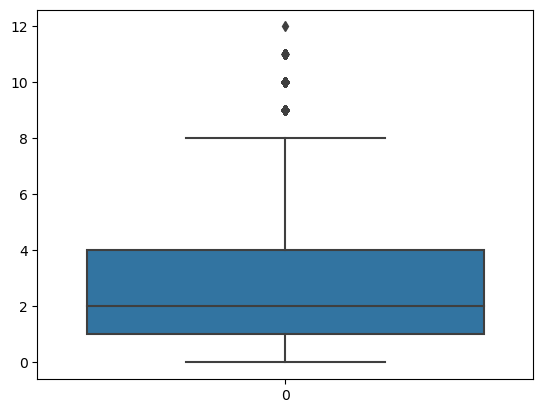

In [19]:
# checking for outliers using statistical summary of CNT_FAM_MEMBERS column and boxplot
print(round(df['YEARS_LAST_PHONE_CHANGE'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),2))
print()

sns.boxplot(df['YEARS_LAST_PHONE_CHANGE'])
plt.show()

**Observations**:     
*  There are outliers in the column.
*  We can impute the missing value with mode but will not be doing as specified in the case study.

#### 2. CNT_FAM_MEMBERS column

In [20]:
#inspecting the column
df[df['CNT_FAM_MEMBERS'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_LAST_PHONE_CHANGE
41982,148605,0,Revolving loans,M,N,Y,0,450000.0,675000.0,33750.0,NaN,NaN,Commercial associate,Lower secondary,Unknown,Municipal apartment,0.015221,-12396,-1161,-3265.0,-4489,1,1,1,1,1,0,Managers,NaN,2,2,THURSDAY,15,0,1,1,0,1,1,Insurance,0.700618,NaN,3.0,0.0,3.0,0.0,876.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2.0
187348,317181,0,Revolving loans,F,N,Y,0,202500.0,585000.0,29250.0,NaN,NaN,Commercial associate,Higher education,Unknown,House / apartment,0.031329,-12844,-232,-1597.0,-1571,1,1,0,1,0,0,Accountants,NaN,2,2,FRIDAY,14,0,0,0,0,0,0,Business Entity Type 2,0.645168,0.670652,1.0,0.0,1.0,0.0,654.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


**Observations**:  
* There are only two rows having missing values in CNT_FAM_MEMBERS column.

In [21]:
#looking at the statistics of the column
df.CNT_FAM_MEMBERS.describe(percentiles=[0.1,0.25,0.5,0.75,0.99])

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
10%           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
99%           5.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

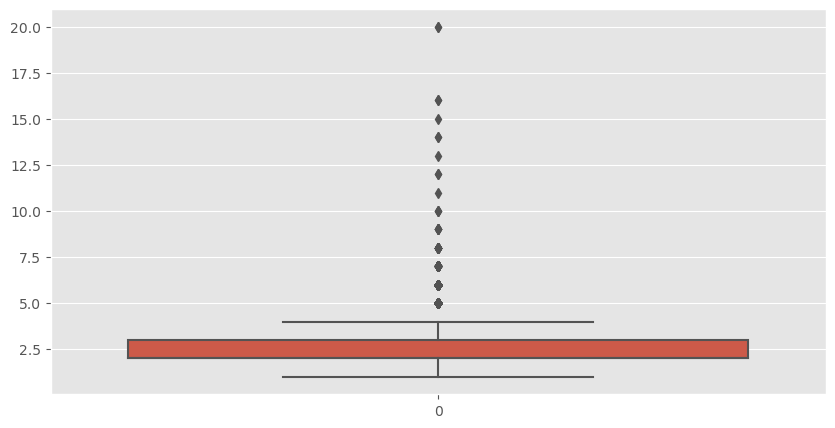

In [22]:
#checking for outliers using boxplot
plt.style.use('ggplot')
plt.figure(figsize=[10,5])
sns.boxplot(df['CNT_FAM_MEMBERS'])
plt.show()

**Observations**:  
* There are outliers but are not invalid as there can be a family having more than 5 members.
* Client family members' count is missing in two rows, drοping these cοlumns wοuldn't make a nοticable difference in the result.

We will not be performing imputation here, reason being since its specified in the case study.

#### 3. AMT_ANNUITY column

In [23]:
#inspecting the column
df[df['AMT_ANNUITY'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_LAST_PHONE_CHANGE
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,450000.0,Unaccompanied,Commercial associate,Incomplete higher,Single / not married,House / apartment,0.026392,-10668,-2523,-4946.0,-3238,1,1,1,1,1,0,High skill tech staff,1.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.626896,0.372334,1.0,0.0,1.0,0.0,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,450000.0,Unaccompanied,Working,Lower secondary,Civil marriage,House / apartment,0.035792,-9027,-1270,-3640.0,-741,1,1,1,1,0,0,Laborers,2.0,2,2,MONDAY,20,0,0,0,0,0,0,Business Entity Type 1,0.727274,0.468660,0.0,0.0,0.0,0.0,706.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,2.0
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.046220,-17376,-3950,-11524.0,-831,1,1,0,1,0,0,Cooking staff,2.0,1,1,WEDNESDAY,15,0,0,0,1,1,1,Self-employed,0.738370,0.452534,1.0,0.0,1.0,0.0,199.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,225000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.035792,-11329,-2040,-3195.0,-3069,1,1,0,1,0,0,Core staff,2.0,2,2,FRIDAY,13,0,0,0,1,1,1,Government,0.566316,0.220095,0.0,0.0,0.0,0.0,2841.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0,8.0
59934,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,360000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.046220,-19762,-2498,-11285.0,-3305,1,1,1,1,1,0,Laborers,1.0,1,1,FRIDAY,15,0,1,1,0,1,1,Other,0.583947,0.177704,0.0,0.0,0.0,0.0,743.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,6.0,2.0
75873,187985,0,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,166500.0,Unaccompanied,Working,Higher education,Single / not married,Rented apartment,0.022800,-20831,-2450,-771.0,-4203,1,1,0,1,0,0,Drivers,1.0,2,2,FRIDAY,15,0,0,0,0,0,0,Business Entity Type 3,0.667564,0.425893,0.0,0.0,0.0,0.0,1986.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,11.0,5.0
89343,203726,0,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,157500.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.015221,-12134,-3721,-858.0,-591,1,1,0,1,1,0,Medicine staff,2.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Medicine,0.154811,0.297087,0.0,0.0,0.0,0.0,348.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0,1.0
123872,243648,0,Cash loans,F,N,Y,0,202500.0,929088.0,NaN,720000.0,Unaccompanied,Working,Secondary / seconda

In [24]:
#looking at the statistics of the column
df.AMT_ANNUITY.describe(percentiles=[0.1,0.25,0.5,0.75,0.99])

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
10%       11074.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
99%       70006.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

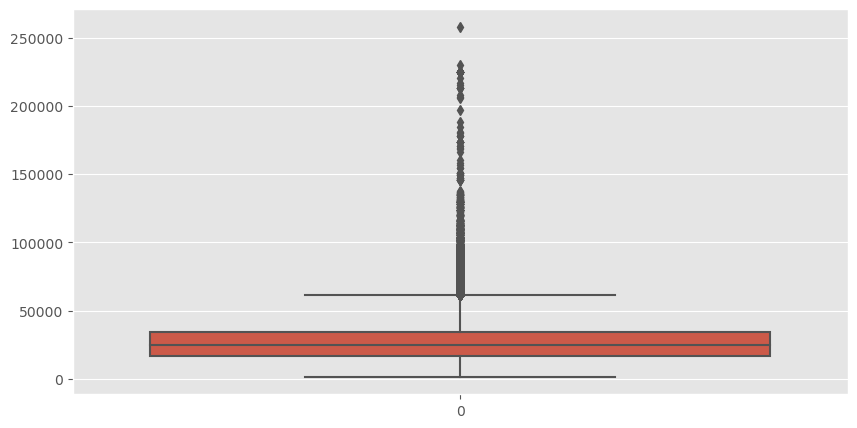

In [25]:
#checking for outliers using boxplot
plt.style.use('ggplot')
plt.figure(figsize=[10,5])
sns.boxplot(df['AMT_ANNUITY'])
plt.show()


**Observations**:  
* There are outliers in the column as the 99th percentile is far from the max value.
* <b>We can impute the missing values with Median - 24903.</b>
* We will not be performing imputation here, reason being since its specified in the case study.

#### 4. AMT_GOODS_PRICE column

In [26]:
#inspecting the column
df[df['AMT_GOODS_PRICE'].isnull()].head(15)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_LAST_PHONE_CHANGE
724,100837,0,Revolving loans,F,N,Y,2,45000.0,135000.0,6750.0,NaN,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.024610,-10072,-381,-519.0,-1834,1,1,1,1,0,0,Core staff,4.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,Kindergarten,0.378174,NaN,2.0,1.0,2.0,1.0,2011.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,6.0
5937,106955,0,Revolving loans,F,N,N,0,157500.0,450000.0,22500.0,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,0.010006,-11993,-2921,-1289.0,-1948,1,1,1,1,1,1,Private service staff,2.0,2,2,SATURDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.464614,0.537070,0.0,0.0,0.0,0.0,476.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
6425,107494,0,Revolving loans,F,N,N,0,67500.0,202500.0,10125.0,NaN,NaN,Working,Higher education,Married,House / apartment,0.008474,-9727,-2712,-4132.0,-800,1,1,1,1,1,0,Accountants,2.0,2,2,WEDNESDAY,18,0,0,0,0,0,0,Trade: type 7,0.565849,NaN,1.0,1.0,1.0,0.0,643.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2.0
6703,107822,0,Revolving loans,F,N,N,1,121500.0,180000.0,9000.0,NaN,NaN,Working,Secondary / secondary special,Civil marriage,House / apartment,0.011657,-11079,-899,-3765.0,-572,1,1,1,1,1,0,Managers,3.0,1,1,WEDNESDAY,11,0,0,0,0,0,0,Government,0.645519,0.863363,1.0,0.0,1.0,0.0,1292.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
7647,108913,0,Revolving loans,M,N,Y,0,180000.0,450000.0,22500.0,NaN,NaN,Working,Higher education,Single / not married,House / apartment,0.032561,-9986,-1847,-4762.0,-506,1,1,1,1,1,0,Security staff,1.0,1,1,SATURDAY,18,0,0,0,0,0,0,Construction,0.552557,0.661024,1.0,0.0,1.0,0.0,159.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
7880,109190,1,Revolving loans,F,N,N,0,121500.0,270000.0,13500.0,NaN,NaN,Working,Higher education,Single / not married,With parents,0.006296,-12390,-640,-6365.0,-3597,1,1,0,1,1,0,Managers,1.0,3,3,FRIDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.407925,0.240541,2.0,0.0,1.0,0.0,158.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
7995,109322,0,Revolving loans,M,N,Y,0,112500.0,180000.0,9000.0,NaN,NaN,Working,Secondary / secondary special,Single / not married,House / apartment,0.008230,-12420,-1610,-6443.0,-2463,1,1,0,1,1,0,Security staff,1.0,2,2,THURSDAY,16,0,1,1,1,1,1,Security,0.078597,0.504681,3.0,0.0,3.0,0.0,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,3.0,0.0
10819,112595,0,Revolving loans,F,N,Y,0,90000.0,270000.0,13500.0,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,0.022800,-18193,-242,-1462.0,-1731,

In [27]:
#looking at the statistics of the column
round(df.AMT_GOODS_PRICE.describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),2)

count     307233.00
mean      538396.21
std       369446.46
min        40500.00
10%       180000.00
25%       238500.00
50%       450000.00
75%       679500.00
99%      1800000.00
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: float64

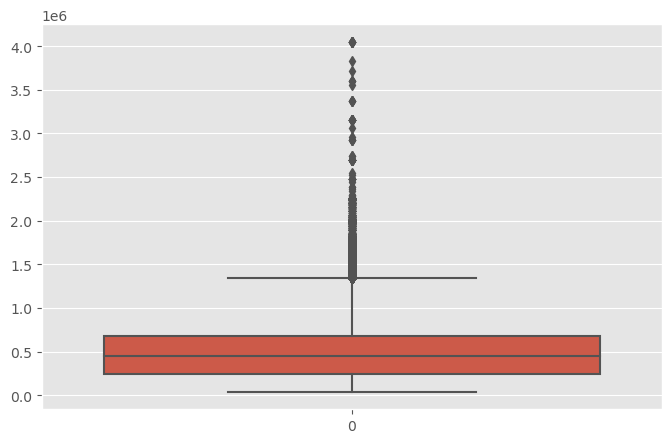

In [28]:
##checking for outliers using boxplot
plt.style.use('ggplot')
plt.figure(figsize=[8,5])
sns.boxplot(df['AMT_GOODS_PRICE'])
plt.show()


**Observations**:  
* There are outliers in the column as the 99th percentile is far off from the max value.
* <b> We can impute the missing values using Median - 450000. </b>

In [29]:
#imputation of the values
df["AMT_ANNUITY"].fillna(df["AMT_ANNUITY"].median(),inplace=True)

#Confirming if the missing values have been replaced
df["AMT_ANNUITY"].isnull().sum()

0

#### 5. EXT_SOURCE_2 and EXT_SOURCE_3 columns

In [30]:
# Comparing EXT_SOURCE_2 and EXT_SOURCE_3 column 
round(df.loc[:, ['EXT_SOURCE_2', 'EXT_SOURCE_3']].describe(),3)

,EXT_SOURCE_2,EXT_SOURCE_3
count,306851.000,246546.000
mean,0.514,0.511
std,0.191,0.195
min,0.000,0.001
25%,0.392,0.371
50%,0.566,0.535
75%,0.664,0.669
max,0.855,0.896


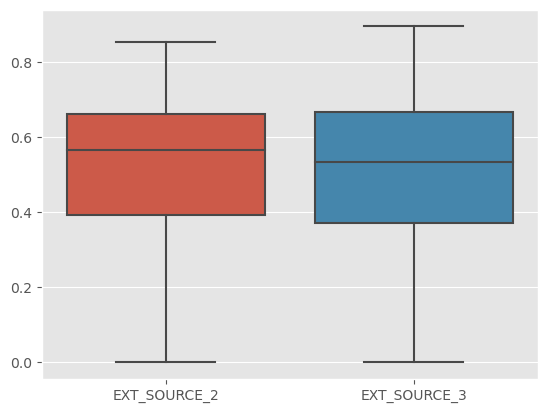

In [31]:
#checking for outliers using boxplot

sns.boxplot(df[['EXT_SOURCE_2','EXT_SOURCE_3']])
plt.show()

**Observations**: 
    
* There is not much difference between the mean and median values.
* <b>We can impute the missisng values with mean in both columns.</b>

In [32]:
#imputing the columns with their respective mean values

df['EXT_SOURCE_2'].fillna(df['EXT_SOURCE_2'].mean(),inplace = True)
df['EXT_SOURCE_3'].fillna(df['EXT_SOURCE_3'].mean(),inplace = True)

#confirming the missing values are replaced

df[['EXT_SOURCE_2','EXT_SOURCE_3']].isnull().sum()

EXT_SOURCE_2    0
EXT_SOURCE_3    0
dtype: int64

#### 6. DEF_60_CNT_SOCIAL_CIRCLE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE columns

**Observations**: 
* These columns have same percentage of missing values ie 0.33%

In [33]:
#inspecting the statistics of the columns

df[['DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE' , 'OBS_60_CNT_SOCIAL_CIRCLE']].describe()

,DEF_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE
count,306490.000000,306490.000000,306490.000000,306490.000000
mean,0.100049,1.422245,0.143421,1.405292
std,0.362291,2.400989,0.446698,2.379803
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.000000,0.000000,2.000000
max,24.000000,348.000000,34.000000,344.000000


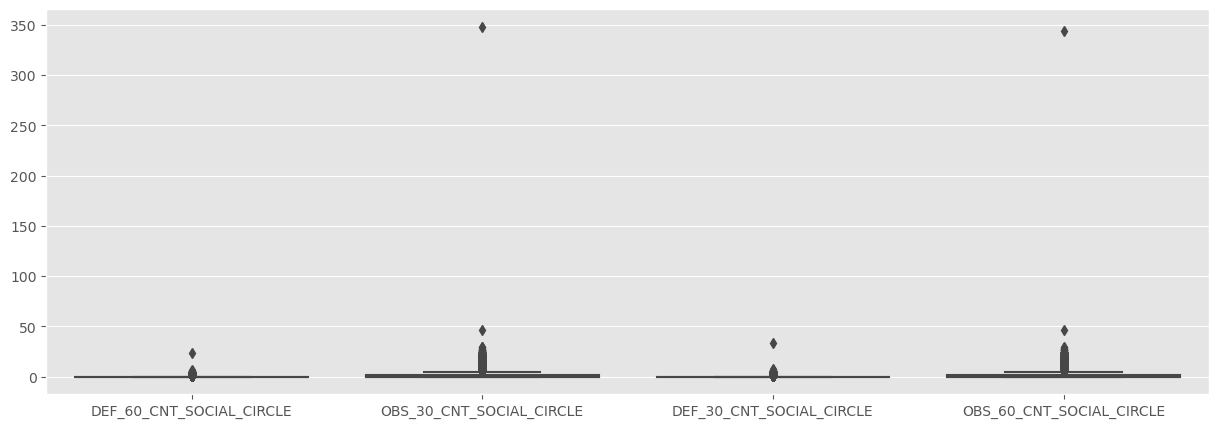

In [34]:
#checking for outliers using boxplot
plt.style.use('ggplot')
plt.figure(figsize=[15,5])
sns.boxplot(df[['DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE' , 'OBS_60_CNT_SOCIAL_CIRCLE']])
plt.show()

**Observations**: 
* There is only 1 outlier in OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE.
* <b> We can impute the missing values with Median - 0 since mean and median are close to each other.</b> 
* We will not be performing imputation here, reason being since its specified in the case study.

#### 7. 'AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT',  'AMT_REQ_CREDIT_BUREAU_MON',    'AMT_REQ_CREDIT_BUREAU_WEEK',  'AMT_REQ_CREDIT_BUREAU_DAY',  'AMT_REQ_CREDIT_BUREAU_HOUR'

**Observations**: 
* These are numerical columns.
* They have same missing percentages value - 13.5%
* The values represent the number of enquiries to Credit Bureau about the client.
* It doesn't make much sense to count the number for a very short period of time such as an hour or a day or a week before the application date. On the other had it also make lesser sense if we count the number for a very long period of time. 
Hence, for a better analysis we will be only considering the `AMT_REQ_CREDIT_BUREAU_QRT`, which is not too short or too long time period.
So, we will have to do two things now:-
1. We will handle missing data for the column `AMT_REQ_CREDIT_BUREAU_QRT`
2. We will delete the column for the count of hour, day, week, month and year.

In [35]:
#inspecting the statistics of the columns

round(df.AMT_REQ_CREDIT_BUREAU_QRT.describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),2)

count    265992.00
mean          0.27
std           0.79
min           0.00
10%           0.00
25%           0.00
50%           0.00
75%           0.00
99%           2.00
max         261.00
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

**Observations**: 
* There is an outlier in the column with value around 260.
* There is significant difference between the 99th percentile and max value.
* <b>We can impute the missing values with Median.</b>

In [36]:
#imputing the missing values
df.AMT_REQ_CREDIT_BUREAU_QRT.fillna(df.AMT_REQ_CREDIT_BUREAU_QRT.median(),inplace = True)

#confirming the missing values are replaced

df.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()

0

In [37]:
#Deleting the unwanted columns mentioned above 

df.drop(['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR'],axis=1,inplace = True)

In [38]:
len(df.columns)

69

**Observations**: 
* We deleted 5 columns from the data set and are left with 69 columns.

#### 8. OCCUPATION_TYPE column

**Observations**: OCCUPATION_TYPE is a categorical column

In [39]:
#Looking at the values present in the column

df.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

**Observations**:
* Clients applying for Loan are maximum 'Laborers'
* Clients working as an 'IT staff' dont often reqiure Loan.
* While applying for loan clients tend not to disclose their occupation so as to get the loans. The values missing in the column can't be replaced by the mode of the column as it can bias the analysis.
* <b>We can impute the missing values with 'Unknown' to make another category in the column.</b>

In [40]:
# imputing the missing values with 'Unknown'
df['OCCUPATION_TYPE'].fillna(value = 'Unknown', inplace = True)

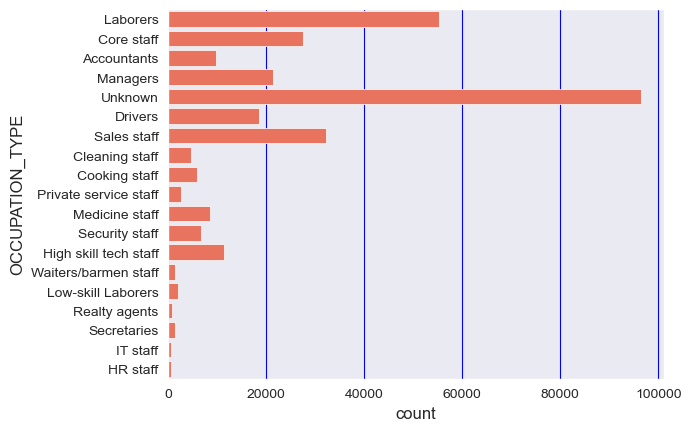

In [41]:
#plotting the distribution of the column using count plot
sns.set_style("darkgrid", {'grid.color': 'blue'})
sns.countplot(data = df, y = 'OCCUPATION_TYPE',color = 'tomato')
plt.show()

#### 9. NAME_TYPE_SUITE column

In [42]:
#Looking at the values present in the column

df.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

**Observations**:
* Majority of the clients went alone to apply for loan.
* If this column values are null, it can be assumed that this column is not mandatory to fill in.
* We can impute the missing values with 'Unaccompanied'.

In [43]:
#imputing the missing values

df["NAME_TYPE_SUITE"].fillna('Unaccompanied',inplace=True)

#confirming if the values are imputed

df["NAME_TYPE_SUITE"].isnull().sum()

0

In [44]:
#After dealing with Null Values we shall look over the data set again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 69 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

**Observations**:
* There are 16 columns of float type
* There are 12 columns of object type
* There are 41 columns of int type

####  We shall look over the columns to inspect incorrect or unkown values, treat outliers and check their data types. We shall also drop some unnecessary columns to properly analyse the data set. Also we shall be creating new columns by binning the column values to make the data more readable.

#### CODE_GENDER column

In [45]:
#seeing the type of values the column has
df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

**Observations**:
* <b>There are doble female clients as comapred to number of male clients.</b>
* There are 4 rows with 'XNA' values and we can drop these rows.


In [46]:
# DRopping the rows with 'XNA' values

df.drop(df.loc[df.CODE_GENDER == 'XNA', :].index, inplace = True)

In [47]:
#confirming if the rows are dropped 
df.CODE_GENDER.value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

#### FLAG_OWN_CAR, FLAG_OWN_REALTY columns

In [48]:
df.FLAG_OWN_CAR.value_counts(normalize = True)*100

N    65.989392
Y    34.010608
Name: FLAG_OWN_CAR, dtype: float64

In [49]:
df.FLAG_OWN_REALTY.value_counts(normalize = True)*100

Y    69.366876
N    30.633124
Name: FLAG_OWN_REALTY, dtype: float64

**Observations**:
* These are categorical columns and we can change the values to numeric values for better analysis.
* FLAG_OWN_CAR column basically informs us that more than 50% of the clients do not own a car.
* FLAG_OWN_REALTY column basically gives us a hint that majority of the clients own a flat or a house.

In [50]:
# converting these columns to numeric categorical columns

df.FLAG_OWN_CAR.replace(['Y','N'],[1,0] ,inplace = True)
df.FLAG_OWN_REALTY.replace(['Y','N'],[1,0],inplace = True)


**Observations**:
* We replaced 'Y' with 1 and 'N' with 0.

#### AMT_INCOME_TOTAL column

In [51]:
#viewing the statistics of the column

round(df.AMT_INCOME_TOTAL.describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))

count       307507.0
mean        168798.0
std         237125.0
min          25650.0
10%          81000.0
25%         112500.0
50%         147150.0
75%         202500.0
99%         472500.0
max      117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

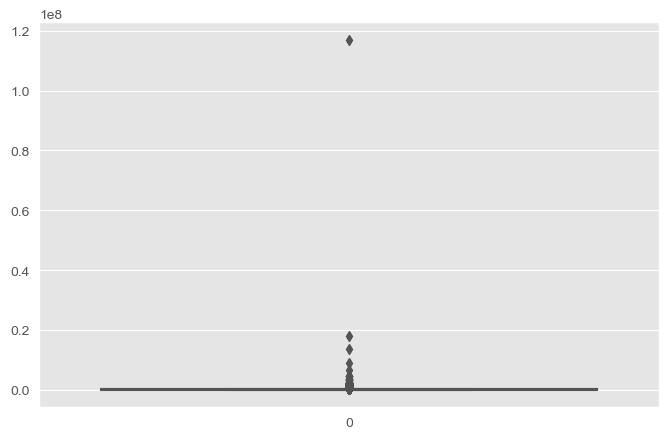

In [52]:
#using the boxplot to see the outliers
plt.style.use('ggplot')
plt.figure(figsize=[8,5])
sns.boxplot(df['AMT_INCOME_TOTAL'])
plt.show()


**Observations**:
* There are outliers clearly and there is a huge difference between the 99th percentile and maximum value.
* We shall be binning the column and creating a new column AMT_INCOME_GROUP

In [53]:
#binning the values

bins = [25650, 75000, 112500, 135000, 157500, 180000, 202500, 225000, 117000000]
labels = ["26K-75K", "75K-112.5K", "112.5K-135K", "135K-157.5K", "157.5K-180K", "180K-202.5K", "202.5K-225K", "225K-117M"]

# Creating a new column AMT_INCOME_GROUP
df['AMT_INCOME_GROUP'] = pd.cut(df['AMT_INCOME_TOTAL'], bins=bins, labels=labels)
df.AMT_INCOME_GROUP.value_counts().sort_values()

180K-202.5K    20389
26K-75K        23890
202.5K-225K    24419
157.5K-180K    32529
135K-157.5K    33627
225K-117M      47117
112.5K-135K    48848
75K-112.5K     76686
Name: AMT_INCOME_GROUP, dtype: int64

#### AMT_CREDIT column

In [54]:
#viewing the statistics of the column

round(df.AMT_CREDIT.describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))

count     307507.0
mean      599029.0
std       402493.0
min        45000.0
10%       180000.0
25%       270000.0
50%       513531.0
75%       808650.0
99%      1854000.0
max      4050000.0
Name: AMT_CREDIT, dtype: float64

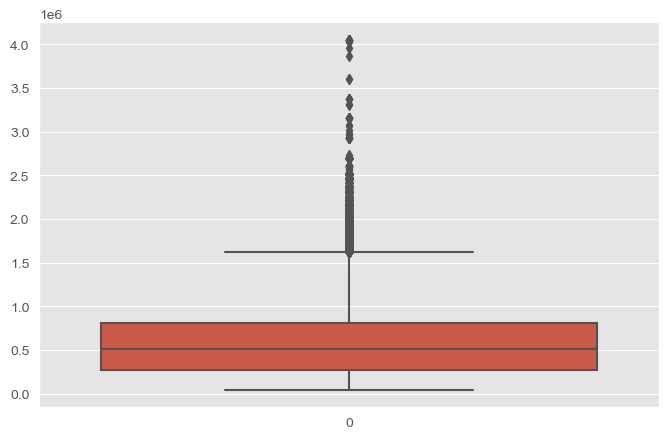

In [55]:
#using the boxplot to see the outliers
plt.style.use('ggplot')
plt.figure(figsize=[8,5])
sns.boxplot(df['AMT_CREDIT'])
plt.show()


**Observations**:
* There many outliers and also there is difference between 99th percentile value and maximum value.
* We shall be binning the column and creating a new column AMT_CREDIT_GROUP

In [56]:
#binning the values 

bins = [45000, 270000, 513531, 808650, 1200000, 1600000, 2000000, 2500000, 4050000]
labels = ['45K-270K', '270K-513.5K', '513.5K-808.65K', '808.65K-1.2M', '1.2M-1.6M', '1.6M-2M', '2M-2.5M', '2.5M-4.05M']

# Create a new column 'AMT_CREDIT_GROUP' based on the bins and labels
df['AMT_CREDIT_GROUP'] = pd.cut(df['AMT_CREDIT'], bins=bins, labels=labels, right=False)

df['AMT_CREDIT_GROUP'].value_counts()

270K-513.5K       82477
513.5K-808.65K    73822
45K-270K          71180
808.65K-1.2M      52169
1.2M-1.6M         21161
1.6M-2M            4669
2M-2.5M            1668
2.5M-4.05M          353
Name: AMT_CREDIT_GROUP, dtype: int64

#### AMT_ANNUITY column

In [57]:
#viewing the statistics of the column

round(df.AMT_ANNUITY.describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))

count    307507.0
mean      27109.0
std       14494.0
min        1616.0
10%       11074.0
25%       16524.0
50%       24903.0
75%       34596.0
99%       70006.0
max      258026.0
Name: AMT_ANNUITY, dtype: float64

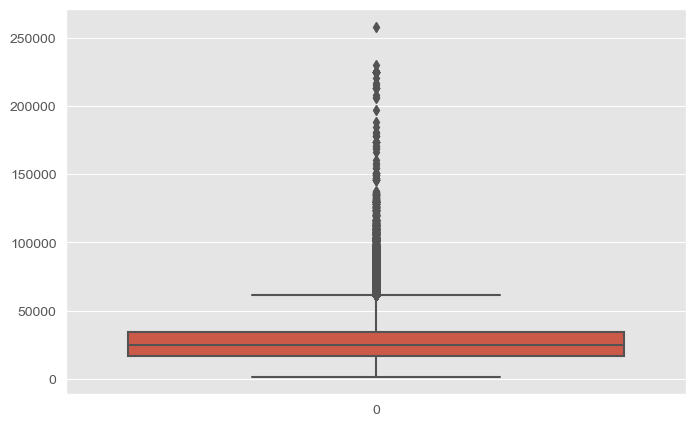

In [58]:
#using the boxplot to see the outliers
plt.style.use('ggplot')
plt.figure(figsize=[8,5])
sns.boxplot(df['AMT_ANNUITY'])
plt.show()


**Observations**:
* There many outliers and also there is difference between 99th percentile value and maximum value.
* We shall be binning the column and creating a new column AMT_ANNUITY_GROUP

In [59]:
#binning the values

bins = [1600,10000,17000,24000,28000,34000,50000,75000,100000,260000]
labels = ['1.6K-10K','10K-17K','17K-24K','24K-28K','28K-34K','34K-50K','50K-75K','75K-100K','100K-260K']

# Create a new column 'AMT_ANNUITY_GROUP' based on the bins and labels
df['AMT_ANNUITY_GROUP'] = pd.cut(df['AMT_ANNUITY'], bins=bins, labels=labels, right=False)

df['AMT_ANNUITY_GROUP'].value_counts()

17K-24K      63427
10K-17K      58716
34K-50K      58604
28K-34K      43295
24K-28K      38885
1.6K-10K     23283
50K-75K      19321
75K-100K      1471
100K-260K      505
Name: AMT_ANNUITY_GROUP, dtype: int64

#### AMT_GOODS_PRICE column

In [60]:
#viewing the statistics of the column

round(df.AMT_GOODS_PRICE.describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))

count     307229.0
mean      538398.0
std       369447.0
min        40500.0
10%       180000.0
25%       238500.0
50%       450000.0
75%       679500.0
99%      1800000.0
max      4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

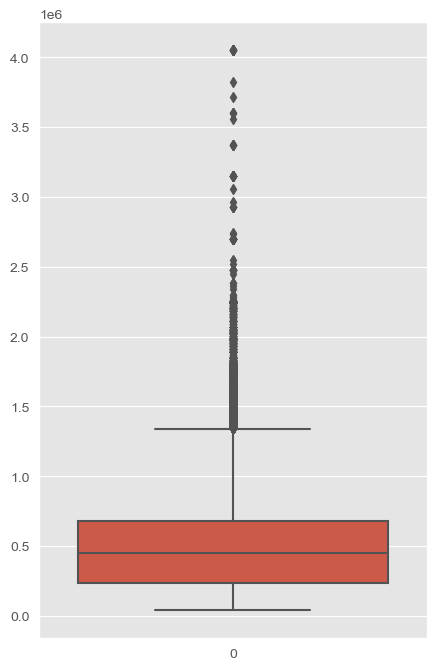

In [61]:
#creating boxplot to look for outliers
plt.style.use('ggplot')
plt.figure(figsize=[5,8])
sns.boxplot(df['AMT_GOODS_PRICE'])
plt.show()

**Observations**:
* The values are well scattered.
* There are outliers as there is a difference between the 99th percentile and the maximum value.
* We shall be binning the column and creating a new column AMT_GOODS_PRICE_GROUP

In [62]:
#binning the values

bins = [40000, 250000, 450000, 680000, 900000, 1200000, 1600000, 2000000, 4050000]
labels = ['40K-250K', '250K-450K', '450K-680K', '680K-900K', '900K-1.2M', '1.2M-1.6M', '1.6M-2M', '2M-4.05M']

df['AMT_GOODS_PRICE_GROUP'] = pd.cut(df['AMT_GOODS_PRICE'], bins=bins, labels=labels, right=False)

df.AMT_GOODS_PRICE_GROUP.value_counts()

450K-680K    99743
40K-250K     84889
250K-450K    47065
900K-1.2M    39693
680K-900K    18237
1.2M-1.6M    13200
1.6M-2M       3309
2M-4.05M      1085
Name: AMT_GOODS_PRICE_GROUP, dtype: int64

#### NAME_TYPE_SUITE column

In [63]:
#seeing the type of values the column has
df.NAME_TYPE_SUITE.value_counts()

Unaccompanied      249815
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

**Observations** :
* Most of the clients went without being accompanied by anyone to apply for loan.

#### NAME_INCOME_TYPE column

In [64]:
#seeing the type of values the column has

df.NAME_INCOME_TYPE.value_counts(normalize = True)*100

Working                 51.631670
Commercial associate    23.289226
Pensioner               18.003493
State servant            7.057726
Unemployed               0.007154
Student                  0.005854
Businessman              0.003252
Maternity leave          0.001626
Name: NAME_INCOME_TYPE, dtype: float64

**Observations** :
* Half of the clients are working professionals who applied for loan.
* Clients who are 'Businessman' are not likely to apply for loans.

#### NAME_EDUCATION_TYPE column

In [65]:
#seeing the type of values the column has

df.NAME_EDUCATION_TYPE.value_counts(normalize = True)*100

Secondary / secondary special    71.019196
Higher education                 24.344812
Incomplete higher                 3.341713
Lower secondary                   1.240947
Academic degree                   0.053332
Name: NAME_EDUCATION_TYPE, dtype: float64

**Observations** :
* Majority of the clients have only Secondary education who applied for loan.
* Very few Clients who have an Academic Degree apply for loans.

#### NAME_FAMILY_STATUS column

In [66]:
#seeing the type of values the column has

df.NAME_FAMILY_STATUS.value_counts()

Married                 196429
Single / not married     45444
Civil marriage           29774
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

**Observations** :
* <b>Majority of the clients who applied for loan are married followed by people who are not married yet.</b>
* Since there are only two rows with status as 'Unknown', so dropping them from the data wont affect our analysis.


In [67]:
df.drop(df.loc[df.NAME_FAMILY_STATUS == 'Unknown', :].index, inplace = True)

In [68]:
# Rechecking if its dropped
df.NAME_FAMILY_STATUS.value_counts()


Married                 196429
Single / not married     45444
Civil marriage           29774
Separated                19770
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64

#### NAME_HOUSING_TYPE column

In [69]:
#seeing the type of values the column has

df.NAME_HOUSING_TYPE.value_counts()

House / apartment      272864
With parents            14840
Municipal apartment     11181
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

**Observations** :
* This column basically tells in what type of apartment the client is living in and whether with parents or not.
* <b>Since we are considering the columns 'NAME_INCOME_TYPE' and 'NAME_FAMILY_STATUS', we can drop the 'NAME_HOUSING_TYPE' column as it won't give any new insights.</b>


In [70]:
# dropping the column 'NAME_HOUSING_TYPE'

df.drop('NAME_HOUSING_TYPE',axis = 1,inplace = True)

#### REGION_POPULATION_RELATIVE - Lets us know that whether the client stays in populated region or not. 
* The information in this column is not giving any direct information whether the client will apply for loan or not, so will be dropping it

In [71]:
#droppoing the REGION_POPULATION_RELATIVE column from data set

df.drop('REGION_POPULATION_RELATIVE',axis = 1,inplace = True)

#### Lets look on the columns related to DAYS - DAYS_BIRTH ,DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH


In [72]:
day_cols = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']
df[day_cols]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,-9461,-637,-3648.0,-2120
1,-16765,-1188,-1186.0,-291
2,-19046,-225,-4260.0,-2531
3,-19005,-3039,-9833.0,-2437
4,-19932,-3038,-4311.0,-3458
...,...,...,...,...
307506,-9327,-236,-8456.0,-1982
307507,-20775,365243,-4388.0,-4090
307508,-14966,-7921,-6737.0,-5150
307509,-11961,-4786,-2562.0,-931


**Observations**:
* These columns have negative values which should be positive according to their description in column description file.
* The values are required to be standardized in years for analysis.

#### DAYS_BIRTH  column

In [73]:
# Converting DAYS_BIRTH to positive days
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'])

#converting the values to years and storing them in new column 'YEARS_BIRTH'

df['YEARS_BIRTH'] = round(df['DAYS_BIRTH']/ 365,0)

#viewing the statistical summary of the column

df['YEARS_BIRTH'].describe()


count    307505.000000
mean         43.938798
std          11.964044
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: YEARS_BIRTH, dtype: float64

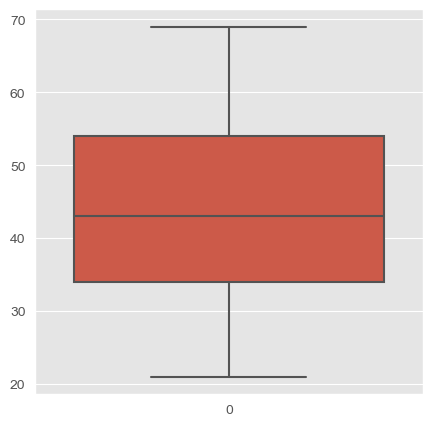

In [74]:
#viewing the boxplot for outliers
plt.style.use('ggplot')
plt.figure(figsize=[5,5])
sns.boxplot(df['YEARS_BIRTH'])
plt.show()

**Observations**:
* Minimum age of client is 21 years and Maximum age of the client is 69 years.
* There are no outliers in the column.
* Majority of the applicants age is in the age group between 34 to 54
* We shall bin the values for better analysis

In [75]:
#binning the values

df['YEARS_BIRTH_GROUP'] = pd.cut(df.YEARS_BIRTH, bins = [0, 18, 30, 40, 55,65,75,85, 100], labels = ['0-18', '18-30', '30-40', '45-55', '55-65','65-75','75-85','85-100'])

#dropping the 'DAYS_BIRTH' column as for analysis it will not be used
df.drop('DAYS_BIRTH', axis = 1, inplace = True)

df['YEARS_BIRTH_GROUP'].value_counts()

45-55     110418
30-40      82767
55-65      59010
18-30      48867
65-75       6443
0-18           0
75-85          0
85-100         0
Name: YEARS_BIRTH_GROUP, dtype: int64

#### DAYS_EMPLOYED column

In [76]:
# Converting DAYS_EMPLOYED to positive days
df['DAYS_EMPLOYED'] = abs(df['DAYS_EMPLOYED'])

#converting the values to years and storing them in new column 'YEARS_EMPLOYED'

df['YEARS_EMPLOYED'] = round(df['DAYS_EMPLOYED']/ 365,0)


#dropping the 'DAYS_EMPLOYED' column as for analysis it will not be used
df.drop('DAYS_EMPLOYED', axis = 1, inplace = True)


#viewing the statistical summary of the column

df['YEARS_EMPLOYED'].describe()

count    307505.000000
mean        185.611483
std         382.168810
min           0.000000
25%           3.000000
50%           6.000000
75%          16.000000
max        1001.000000
Name: YEARS_EMPLOYED, dtype: float64

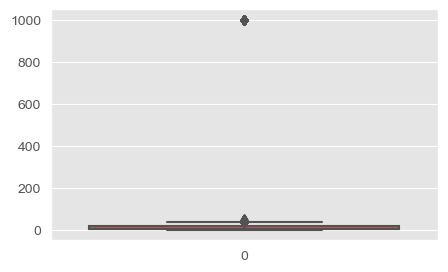

In [77]:
#using boxplot to detect outliers

plt.style.use("ggplot")
plt.figure(figsize=[5,3])
sns.boxplot(df['YEARS_EMPLOYED'])
plt.show()

In [78]:
#taking a note of no. of rows having more than 50 Years of Employment

df[df['YEARS_EMPLOYED']>50].shape

(55374, 72)

**Observations**:
* There is an outlier whose value is 1000 years.
* There are more than 55000 rows with the outlier value which is definitely due to wrong data.
* Deleting so many rows will not be fruitful and hence this column will not be treated for outliers.
* <b> This column will not be used for any analysis.</b>

#### DAYS_REGISTRATION column

In [79]:
# Converting DAYS_REGISTRATION to positive days
df['DAYS_REGISTRATION'] = abs(df['DAYS_REGISTRATION'])

#converting the values to years and storing them in new column 'YEARS_REGISTRATION'

df['YEARS_REGISTRATION'] = round(df['DAYS_REGISTRATION']/ 365,0)

#dropping the 'DAYS_REGISTRATION' column as for analysis it will not be used
df.drop('DAYS_REGISTRATION', axis = 1, inplace = True)

#viewing the statistical summary of the column

df['YEARS_REGISTRATION'].describe()


count    307505.000000
mean         13.659518
std           9.659375
min           0.000000
25%           6.000000
50%          12.000000
75%          20.000000
max          68.000000
Name: YEARS_REGISTRATION, dtype: float64

**Observations**:
* There is not much difference between Mean and Median
* There are outliers but they are not wrong values.
* Majority of the applicants' resigration years range between 5 to 20.

#### DAYS_ID_PUBLISH column

In [80]:
# Converting DAYS_ID_PUBLISH to positive days
df['DAYS_ID_PUBLISH'] = abs(df['DAYS_ID_PUBLISH'])

#converting the values to years and storing them in new column 'YEARS_ID_PUBLISH'

df['YEARS_ID_PUBLISH'] = round(df['DAYS_ID_PUBLISH']/ 365,0)

#dropping the 'DAYS_ID_PUBLISH' column as for analysis it will not be used
df.drop('DAYS_ID_PUBLISH', axis = 1, inplace = True)

#viewing the statistical summary of the column

df['YEARS_ID_PUBLISH'].describe()


count    307505.000000
mean          8.198572
std           4.151531
min           0.000000
25%           5.000000
50%           9.000000
75%          12.000000
max          20.000000
Name: YEARS_ID_PUBLISH, dtype: float64

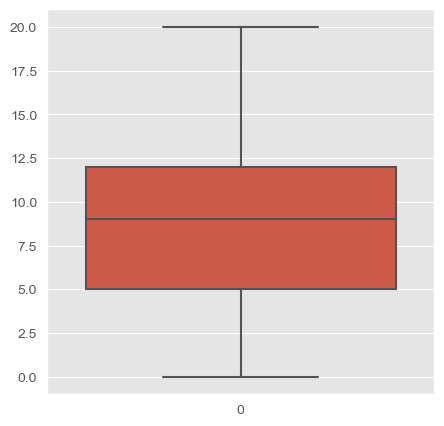

In [81]:
#viweing the boxplot for outliers

plt.style.use('ggplot')
plt.figure(figsize = [5,5])
sns.boxplot(df['YEARS_ID_PUBLISH'])
plt.show()

**Observations**:
* There no outliers in the column.
* There is not much difference between Mean and Median
* Most of the applicants who have changed ID, fall in ranges between 5 to 20 years.

#### ORGANIZATION_TYPE column

In [82]:
#seeing the type of values the column has

df.ORGANIZATION_TYPE.value_counts(normalize = True) * 100

Business Entity Type 3    22.110860
XNA                       18.007512
Self-employed             12.491504
Other                      5.425278
Medicine                   3.639616
Business Entity Type 2     3.431489
Government                 3.383360
School                     2.891985
Trade: type 7              2.546625
Kindergarten               2.237037
Construction               2.185656
Business Entity Type 1     1.945659
Transport: type 4          1.755419
Trade: type 3              1.135591
Industry: type 9           1.095267
Industry: type 3           1.065674
Security                   1.055918
Housing                    0.961936
Industry: type 11          0.879335
Military                   0.856571
Bank                       0.815271
Agriculture                0.798036
Police                     0.761288
Transport: type 2          0.716736
Postal                     0.701452
Security Ministries        0.641941
Trade: type 2              0.617876
Restaurant                 0

**Observations**:
* There 18% 'XNA' values in the column by which it can be assumed that those 18% of clients did not provide any imformation about their organization type.
* These rows cannot be dropped nor replaced with any other value.
* There Are Various Subcategories Like Business Entity Type 3 , Business Entity Type 2, Business Entity Type 1 & Many Others. We can make a Single Category. Eg Business Entity Type 3, Business Entity Type 2, Business Entity Type 1 will Be Converted to 1 Category Business Entity & Similarly Others.

In [83]:
df.ORGANIZATION_TYPE.replace(['Business Entity Type 1', 'Business Entity Type 2', 'Business Entity Type 3'], 'Business_Entity', inplace = True)
df.ORGANIZATION_TYPE.replace(['Trade: type 1', 'Trade: type 2', 'Trade: type 3', 'Trade: type 4', 'Trade: type 5', 'Trade: type 6', 'Trade: type 7'], 'Trade', inplace = True)
df.ORGANIZATION_TYPE.replace(['Transport: type 1', 'Transport: type 2', 'Transport: type 3', 'Transport: type 4'], 'Transport', inplace = True)
df.ORGANIZATION_TYPE.replace(['Industry: type 1', 'Industry: type 2', 'Industry: type 3', 'Industry: type 4', 'Industry: type 5', 'Industry: type 6', 'Industry: type 7', 'Industry: type 8', 'Industry: type 9', 'Industry: type 10', 'Industry: type 11', 'Industry: type 12', 'Industry: type 13'], 'Industry', inplace = True)

In [84]:
#confirming if the values got replaced
df.ORGANIZATION_TYPE.value_counts(normalize = True) * 100

Business_Entity        27.488008
XNA                    18.007512
Self-employed          12.491504
Other                   5.425278
Trade                   4.655209
Industry                4.653583
Medicine                3.639616
Government              3.383360
Transport               2.923530
School                  2.891985
Kindergarten            2.237037
Construction            2.185656
Security                1.055918
Housing                 0.961936
Military                0.856571
Bank                    0.815271
Agriculture             0.798036
Police                  0.761288
Postal                  0.701452
Security Ministries     0.641941
Restaurant              0.588934
Services                0.512187
University              0.431538
Hotel                   0.314141
Electricity             0.308938
Insurance               0.193818
Telecom                 0.187639
Emergency               0.182111
Advertising             0.139510
Realtor                 0.128778
Culture   

#### FLAG_DOCUMENT columns

In [85]:
#seeing the value counts for each FLAG_DOCUMENT column

for i in range(2,22):
    print(df['FLAG_DOCUMENT_'+str(i)].value_counts())

0    307492
1        13
Name: FLAG_DOCUMENT_2, dtype: int64
1    218340
0     89165
Name: FLAG_DOCUMENT_3, dtype: int64
0    307480
1        25
Name: FLAG_DOCUMENT_4, dtype: int64
0    302858
1      4647
Name: FLAG_DOCUMENT_5, dtype: int64
0    280427
1     27078
Name: FLAG_DOCUMENT_6, dtype: int64
0    307447
1        58
Name: FLAG_DOCUMENT_7, dtype: int64
0    282481
1     25024
Name: FLAG_DOCUMENT_8, dtype: int64
0    306307
1      1198
Name: FLAG_DOCUMENT_9, dtype: int64
0    307498
1         7
Name: FLAG_DOCUMENT_10, dtype: int64
0    306302
1      1203
Name: FLAG_DOCUMENT_11, dtype: int64
0    307503
1         2
Name: FLAG_DOCUMENT_12, dtype: int64
0    306421
1      1084
Name: FLAG_DOCUMENT_13, dtype: int64
0    306602
1       903
Name: FLAG_DOCUMENT_14, dtype: int64
0    307133
1       372
Name: FLAG_DOCUMENT_15, dtype: int64
0    304452
1      3053
Name: FLAG_DOCUMENT_16, dtype: int64
0    307423
1        82
Name: FLAG_DOCUMENT_17, dtype: int64
0    305005
1      2500
Name: FL

**Observations**:
* It can be easily seen that FLAG_DOCUMENT_3 has been provided by majority of the clients - giving us the hint that this particular document was the most important one and the others not so important.

* **The rest of the FLAG_DOCUMENT can be dropped.**

* **This is being assumed purely based on the data set and inferences.**

In [86]:
#dropping all other columns except FLAG_DOCUMENT_3

df.drop(['FLAG_DOCUMENT_2'],axis = 1, inplace = True)

for i in range(4,22):
    df.drop(['FLAG_DOCUMENT_'+str(i)], axis = 1, inplace = True)


In [87]:
#Looking the columns if dropped or not

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307505 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307505 non-null  int64   
 1   TARGET                       307505 non-null  int64   
 2   NAME_CONTRACT_TYPE           307505 non-null  object  
 3   CODE_GENDER                  307505 non-null  object  
 4   FLAG_OWN_CAR                 307505 non-null  int64   
 5   FLAG_OWN_REALTY              307505 non-null  int64   
 6   CNT_CHILDREN                 307505 non-null  int64   
 7   AMT_INCOME_TOTAL             307505 non-null  float64 
 8   AMT_CREDIT                   307505 non-null  float64 
 9   AMT_ANNUITY                  307505 non-null  float64 
 10  AMT_GOODS_PRICE              307229 non-null  float64 
 11  NAME_TYPE_SUITE              307505 non-null  object  
 12  NAME_INCOME_TYPE             307505 non-null

**Observations**:
* Looking at some columns and their description I find that those are not important for the analysis we are required to do.
* These columns don't impact banks whether to give loan or not.
* The columns will be dropped from the data set for the above said reasons.

In [88]:

df.drop('HOUR_APPR_PROCESS_START', axis = 1, inplace = True)
df.drop('REG_REGION_NOT_WORK_REGION', axis = 1, inplace = True)
df.drop('LIVE_REGION_NOT_WORK_REGION', axis = 1, inplace = True)
df.drop('REG_CITY_NOT_WORK_CITY', axis = 1, inplace = True)
df.drop('WEEKDAY_APPR_PROCESS_START', axis = 1, inplace = True)

df.drop('YEARS_REGISTRATION', axis = 1, inplace = True)
df.drop('REGION_RATING_CLIENT', axis = 1, inplace = True)
df.drop('REGION_RATING_CLIENT_W_CITY', axis = 1, inplace = True)

df.drop('REG_REGION_NOT_LIVE_REGION', axis = 1, inplace = True)
df.drop('REG_CITY_NOT_LIVE_CITY', axis = 1, inplace = True)
df.drop('LIVE_CITY_NOT_WORK_CITY', axis = 1, inplace = True)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307505 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   SK_ID_CURR                 307505 non-null  int64   
 1   TARGET                     307505 non-null  int64   
 2   NAME_CONTRACT_TYPE         307505 non-null  object  
 3   CODE_GENDER                307505 non-null  object  
 4   FLAG_OWN_CAR               307505 non-null  int64   
 5   FLAG_OWN_REALTY            307505 non-null  int64   
 6   CNT_CHILDREN               307505 non-null  int64   
 7   AMT_INCOME_TOTAL           307505 non-null  float64 
 8   AMT_CREDIT                 307505 non-null  float64 
 9   AMT_ANNUITY                307505 non-null  float64 
 10  AMT_GOODS_PRICE            307229 non-null  float64 
 11  NAME_TYPE_SUITE            307505 non-null  object  
 12  NAME_INCOME_TYPE           307505 non-null  object  
 13  NAME_EDUCATION

### After cleaning the data and treating some outliers we are left with 42 columns.

### Now we can analyse the Application Data Dataset

### Data Analysis

For our analysis we will split the data into two data sets with respect to our TARGET variable.

**df_t0** - Which Consists of All The Rows Having Target as 0

**df_t1** - Which Consists of All The Rows Having Target as 1

In [90]:
df_t0 = df[df['TARGET']==0]
df_t0.head()



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_QRT,YEARS_LAST_PHONE_CHANGE,AMT_INCOME_GROUP,AMT_CREDIT_GROUP,AMT_ANNUITY_GROUP,AMT_GOODS_PRICE_GROUP,YEARS_BIRTH,YEARS_BIRTH_GROUP,YEARS_EMPLOYED,YEARS_ID_PUBLISH
1,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,1,1,0,1,1,0,Core staff,2.0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,828.0,1,0.0,2.0,225K-117M,1.2M-1.6M,34K-50K,900K-1.2M,46.0,45-55,3.0,1.0
2,100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,1,1,1,1,1,0,Laborers,1.0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0.0,2.0,26K-75K,45K-270K,1.6K-10K,40K-250K,52.0,45-55,1.0,7.0
3,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,1,1,0,1,0,0,Laborers,2.0,Business_Entity,0.650442,0.510853,2.0,0.0,2.0,0.0,617.0,1,0.0,2.0,112.5K-135K,270K-513.5K,28K-34K,250K-450K,52.0,45-55,8.0,7.0
4,100007,0,Cash loans,M,0,1,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,1,1,0,1,0,0,Core staff,1.0,Religion,0.322738,0.510853,0.0,0.0,0.0,0.0,1106.0,0,0.0,3.0,112.5K-135K,270K-513.5K,17K-24K,450K-680K,55.0,45-55,8.0,9.0
5,100008,0,Cash loans,M,0,1,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,1,1,1,1,1,0,Laborers,2.0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,2536.0,1,1.0,7.0,75K-112.5K,270K-513.5K,24K-28K,450K-680K,46.0,45-55,4.0,1.0


In [91]:
df_t1 = df[df['TARGET']==1]
df_t1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_QRT,YEARS_LAST_PHONE_CHANGE,AMT_INCOME_GROUP,AMT_CREDIT_GROUP,AMT_ANNUITY_GROUP,AMT_GOODS_PRICE_GROUP,YEARS_BIRTH,YEARS_BIRTH_GROUP,YEARS_EMPLOYED,YEARS_ID_PUBLISH
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,1,1,0,1,1,0,Laborers,1.0,Business_Entity,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,1,0.0,3.0,180K-202.5K,270K-513.5K,24K-28K,250K-450K,26.0,18-30,2.0,6.0
26,100031,1,Cash loans,F,0,1,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,1,1,0,1,0,0,Cooking staff,1.0,Business_Entity,0.548477,0.190706,10.0,1.0,10.0,0.0,161.0,1,2.0,0.0,75K-112.5K,808.65K-1.2M,24K-28K,680K-900K,51.0,45-55,7.0,5.0
40,100047,1,Cash loans,M,0,1,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,1,1,0,1,0,0,Laborers,2.0,Business_Entity,0.306841,0.320163,0.0,0.0,0.0,0.0,1075.0,1,0.0,3.0,180K-202.5K,808.65K-1.2M,34K-50K,680K-900K,48.0,45-55,3.0,3.0
42,100049,1,Cash loans,F,0,0,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,1,1,1,1,1,0,Sales staff,2.0,Self-employed,0.674203,0.399676,1.0,0.0,1.0,0.0,1480.0,1,0.0,4.0,112.5K-135K,270K-513.5K,10K-17K,40K-250K,37.0,30-40,10.0,12.0
81,100096,1,Cash loans,F,0,1,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,1,0,0,1,0,0,Unknown,2.0,XNA,0.023952,0.720944,1.0,1.0,1.0,1.0,0.0,0,0.0,0.0,75K-112.5K,45K-270K,10K-17K,250K-450K,68.0,65-75,1001.0,12.0


In [92]:
print(df_t0.shape)
print(df_t1.shape)

(282680, 42)
(24825, 42)


**Observations**:
* There are 282680 clients who are able to pay the loan on-time and are Non-Defaulters.
* There are 24825 clients who are not able to pay the loan on-time and are Defaulters.

#### Analysing the Application Data dataset on basis of TARGET variable

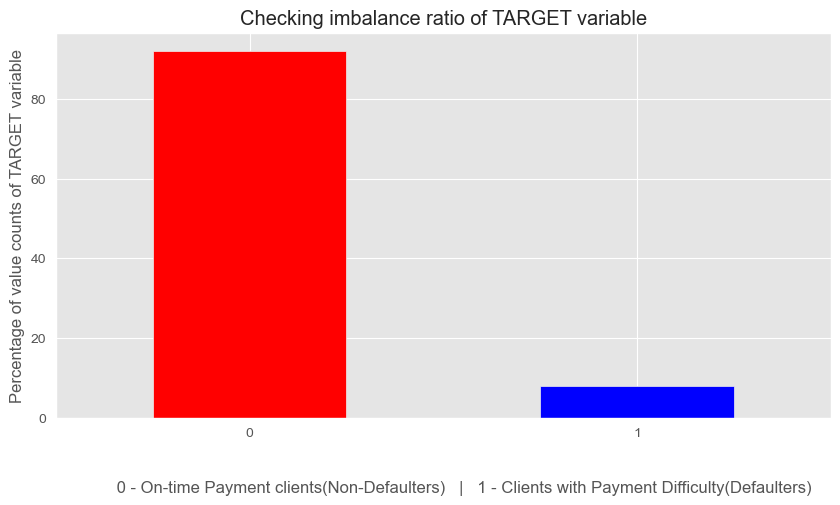

In [93]:
plt.figure(figsize = [10,5])
plt.style.use('ggplot')
(df.TARGET.value_counts(normalize = True)*100).plot.bar(color = ['red', 'blue'])
plt.title("Checking imbalance ratio of TARGET variable")
plt.xticks(rotation = 0)
plt.xlabel("\n\n         0 - On-time Payment clients(Non-Defaulters)   |   1 - Clients with Payment Difficulty(Defaulters)")
plt.ylabel("Percentage of value counts of TARGET variable")

plt.show()

### Checking the imbalance ratio

In [94]:
round(df_t0.shape[0]/df_t1.shape[0] ,2)

11.39

**Observations**:
* <b>1 in every 11 applicant has payment difficulty. 

### Univariate Analysis

#### Defaulters and Non-Defaulters on the basis of Loan type

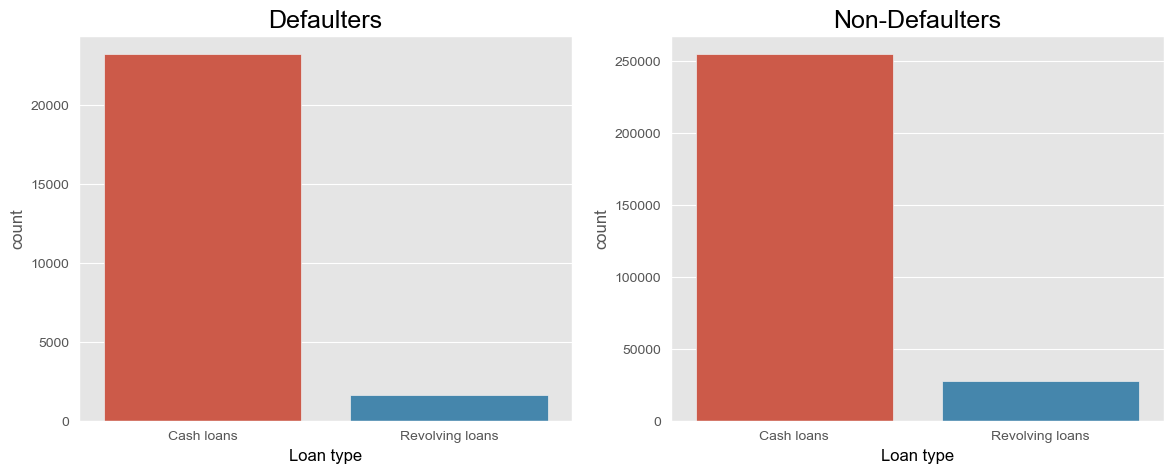

In [95]:
#plotting the graph for clients with payment difficulties

plt.figure(figsize=(14,5))
plt.style.use('ggplot')
plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE',data=df_t1)
plt.title('Defaulters',fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Black'})
ax.set_xlabel('Loan type',fontdict={'fontsize': 12, 'fontweight' : 8, 'color' : 'Black'} )

#plotting the graph for on-time payment clients

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE',data=df_t0)
plt.title('Non-Defaulters',fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Black'})
ax.set_xlabel('Loan type',fontdict={'fontsize': 12, 'fontweight' : 8, 'color' : 'Black'} )

plt.show()

**Observations**:
* <b>In both cases Number of applications for Cash Loans is more than Resolving Loans.</b>

#### Defaulters and Non-Defaulters on the basis of gender

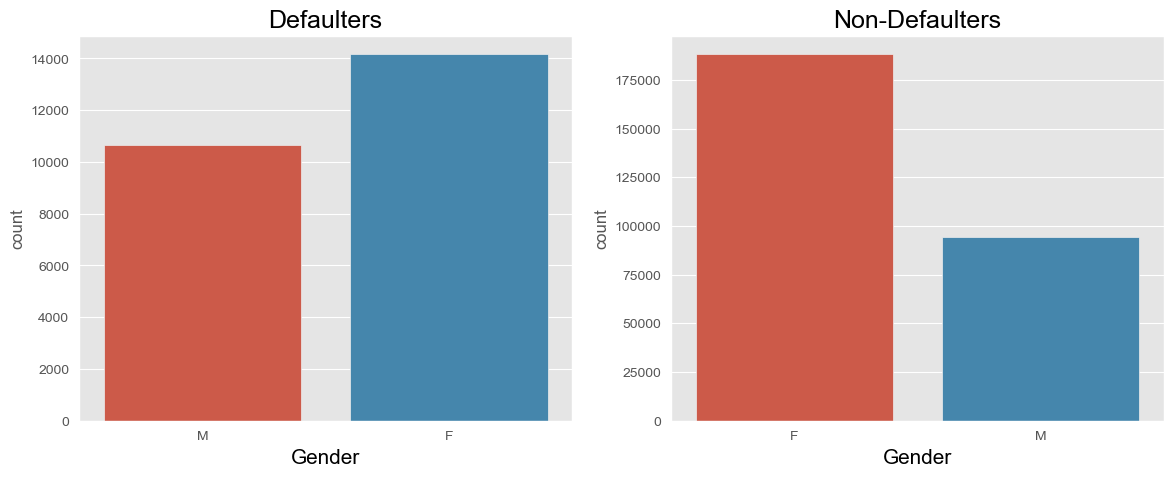

In [96]:
#plotting the graph for clients with payment difficulties

plt.figure(figsize=(14,5))
plt.style.use('ggplot')
plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CODE_GENDER',data=df_t1)
plt.title('Defaulters',fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Black'})
ax.set_xlabel('Gender',fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Black'} )

#plotting the graph for on-time payment clients

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CODE_GENDER',data=df_t0)
plt.title('Non-Defaulters',fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Black'})
ax.set_xlabel('Gender',fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Black'} )

plt.show()

**Observations**:
* <b>Females apply for loans more than men.
* <b>Male clients are less likely to repay the loans.   

#### Defaulters and Non-Defaulters on the basis of owning a car or not

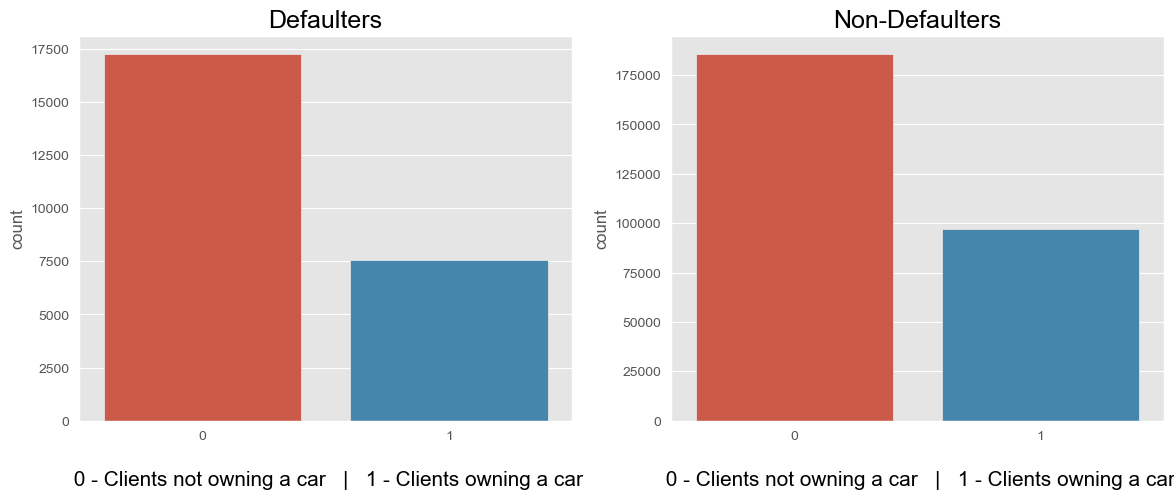

In [97]:
#plotting the graph for clients with payment difficulties

plt.figure(figsize=(14,5))
plt.style.use('ggplot')
plt.subplot(1,2,1)    
ax = sns.countplot(x = 'FLAG_OWN_CAR',data=df_t1)
plt.title('Defaulters',fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Black'})
ax.set_xlabel("\n 0 - Clients not owning a car   |   1 - Clients owning a car",fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Black'} )

#plotting the graph for on-time payment clients

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'FLAG_OWN_CAR',data=df_t0)
plt.title('Non-Defaulters',fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Black'})
ax.set_xlabel("\n 0 - Clients not owning a car   |   1 - Clients owning a car",fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Black'} )

plt.show()

**Observations**:
* <b>Majority of the Clients who do not own a car are the ones who apply for loans.

#### Defaulters and Non-Defaulters on the basis of owning a house or not

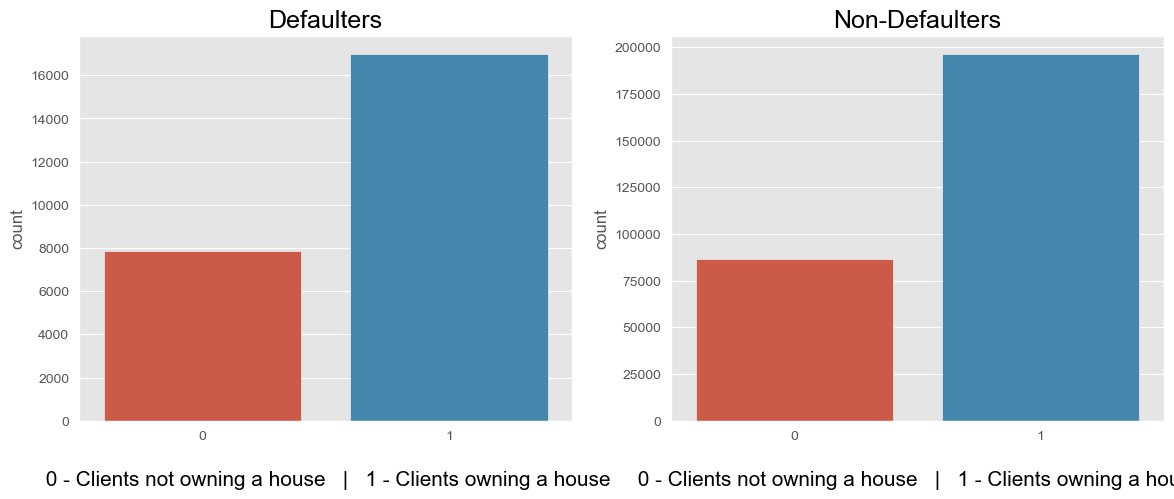

In [98]:
#plotting the graph for clients with payment difficulties

plt.figure(figsize=(14,5))
plt.style.use('ggplot')
plt.subplot(1,2,1)    
ax = sns.countplot(x = 'FLAG_OWN_REALTY',data=df_t1)
plt.title('Defaulters',fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Black'})
ax.set_xlabel("\n 0 - Clients not owning a house   |   1 - Clients owning a house",fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Black'} )

#plotting the graph for on-time payment clients

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'FLAG_OWN_REALTY',data=df_t0)
plt.title('Non-Defaulters',fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Black'})
ax.set_xlabel("\n 0 - Clients not owning a house   |   1 - Clients owning a house",fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Black'} )

plt.show()

**Observations**:
* <b>Majority of the Clients who do own a house are the ones who apply for loans.
* <b>Clients who own real estate are more than double in number compared to those who don’t own.
* <b>There is not significant correlation between owning a house and being a defaulter.

#### Defaulters and Non-Defaulters on the basis of Income type

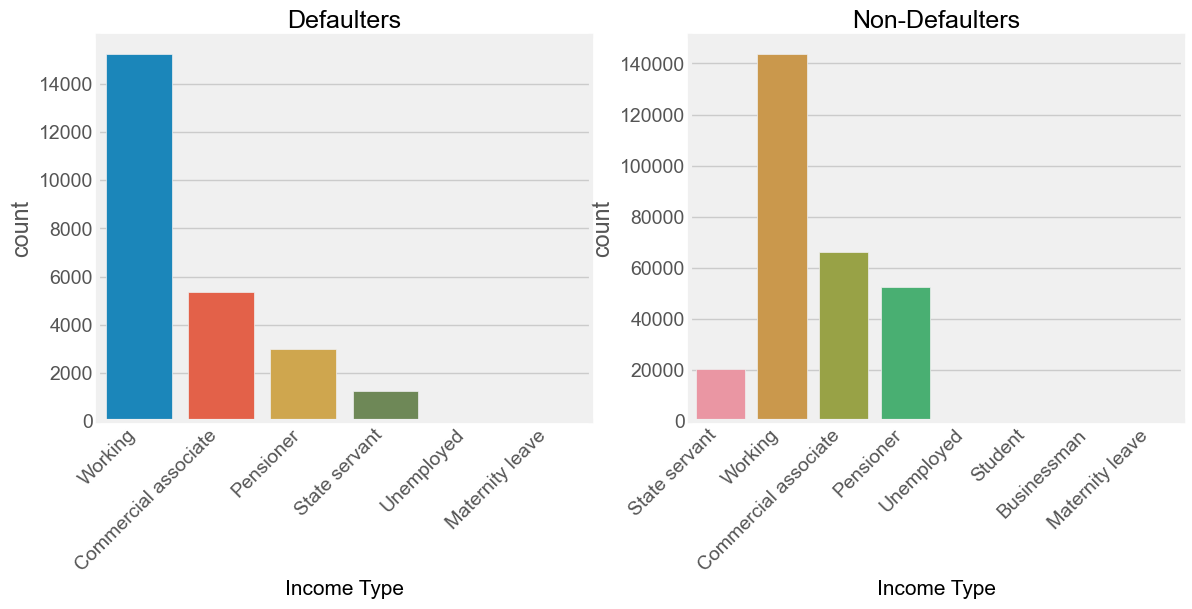

In [99]:
#plotting the graph for clients with payment difficulties

plt.figure(figsize=(14,5))
plt.style.use('fivethirtyeight')
plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=df_t1)
plt.title('Defaulters',fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Black'})
ax.set_xlabel("Income Type",fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Black'} )
val = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
#plotting the graph for on-time payment clients

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=df_t0)
plt.title('Non-Defaulters',fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Black'})
ax.set_xlabel("Income Type",fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Black'} )
val = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.show()

**Observations**:
* <b>'Working' Clients have majorly applied for loans.
* <b> Students do not have payment difficulty.
* <b>'Pensioner' clients are likely to pay the loans back.

#### Defaulters and Non-Defaulters on the basis of Education type

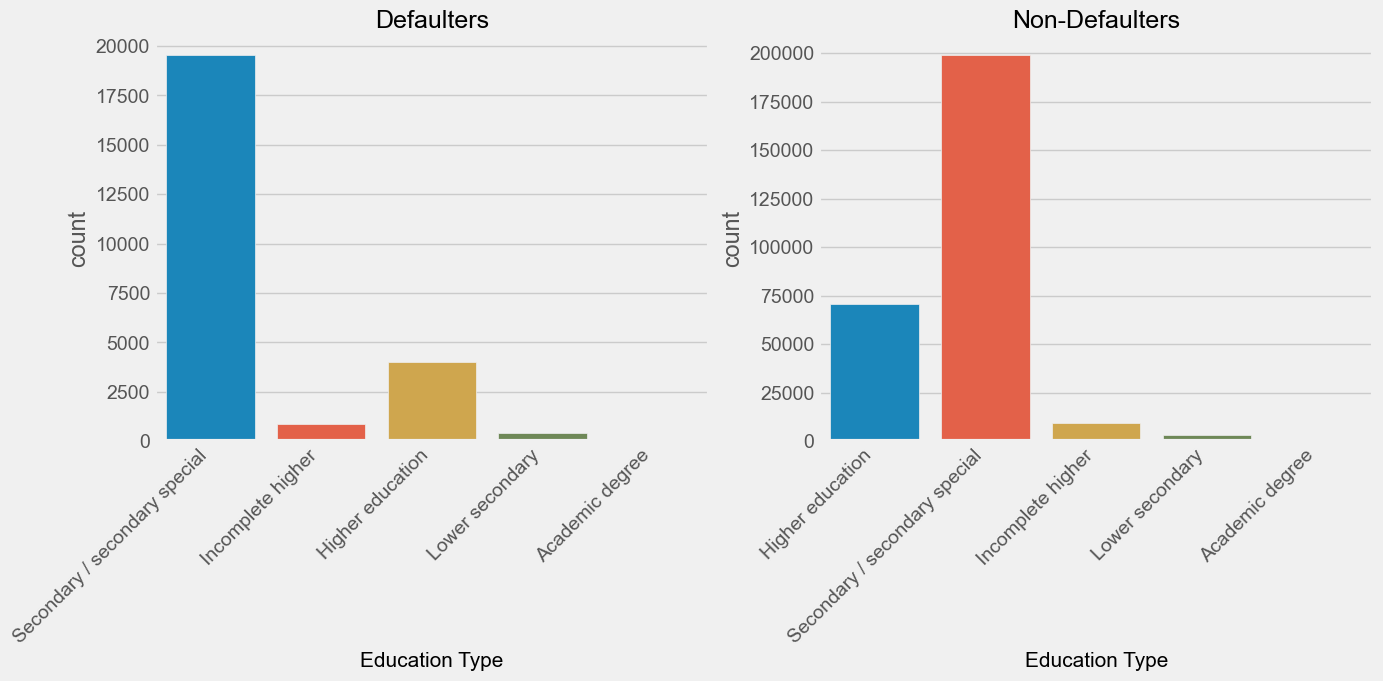

In [100]:
#plotting the graph for clients with payment difficulties

plt.figure(figsize=(14,5))
plt.style.use('fivethirtyeight')
plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=df_t1)
plt.title('Defaulters',fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Black'})
ax.set_xlabel("Education Type",fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Black'} )
val = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
#plotting the graph for on-time payment clients

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=df_t0)
plt.title('Non-Defaulters',fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Black'})
ax.set_xlabel("Education Type",fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Black'} )
val = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.show()

**Observations**:
* <b>Clients who have 'Secondary Education' have majorly applied for loans.
* <b>Clients who have completed their 'Higher Education' have better on-time payments.


#### Defaulters and Non-Defaulters on the basis of Family status

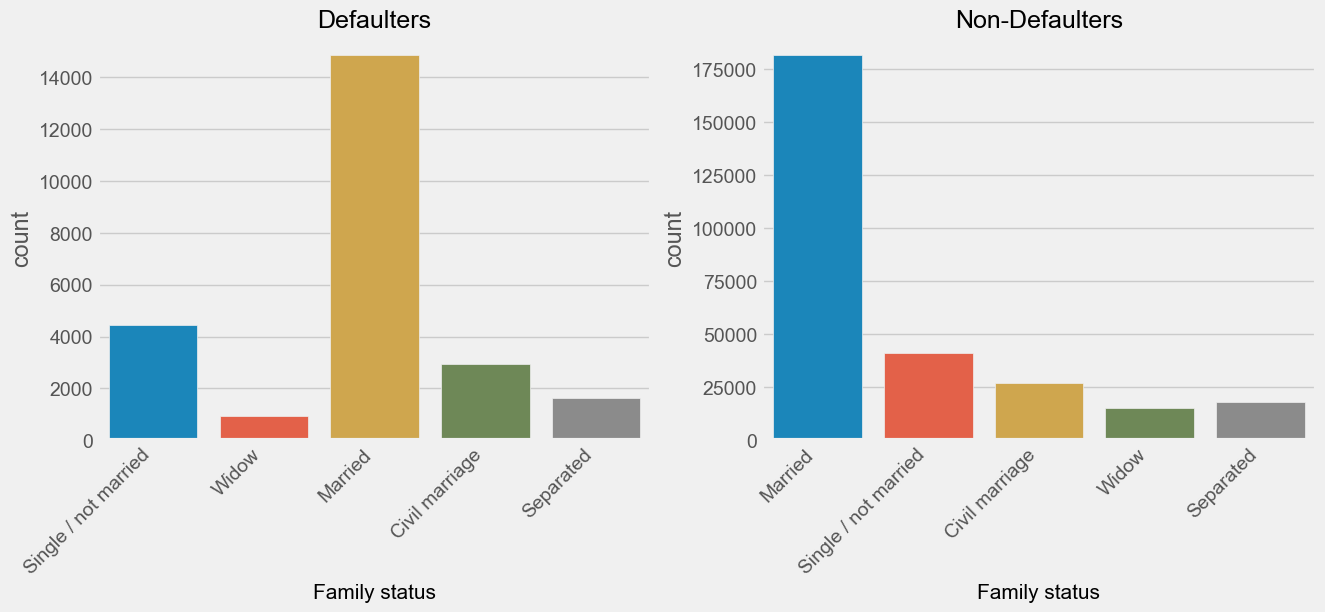

In [101]:
#plotting the graph for clients with payment difficulties

plt.figure(figsize=(14,5))
plt.style.use('fivethirtyeight')
plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',data=df_t1)
plt.title('Defaulters',fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Black'})
ax.set_xlabel("Family status",fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Black'} )
val = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
#plotting the graph for on-time payment clients

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',data=df_t0)
plt.title('Non-Defaulters',fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Black'})
ax.set_xlabel("Family status",fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Black'} )
val = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.show()

**Observations**:
* <b>Clients who are married have majorly applied for loans.
* <b>Clients who are 'Single/not married' have more difficulties with on-time payments comparatively.


#### Defaulters and Non-Defaulters on the basis of Occupation type

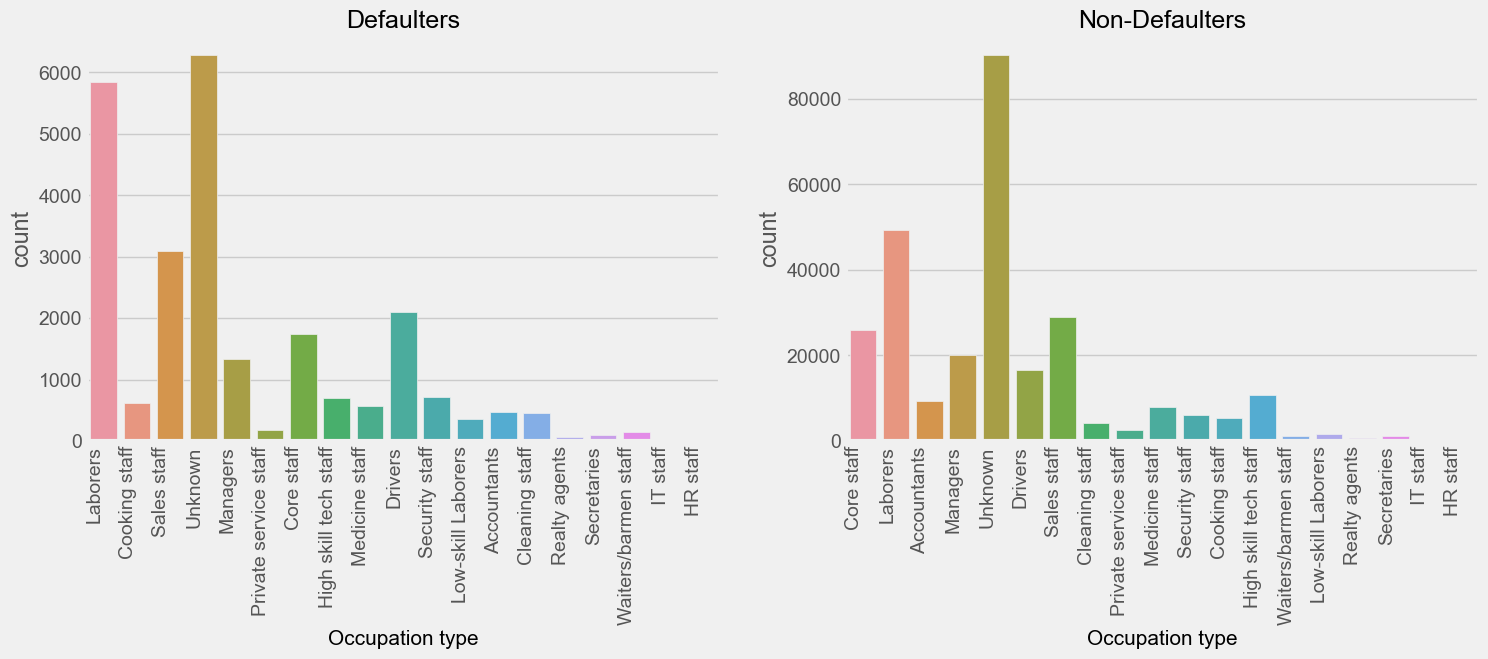

In [102]:
#plotting the graph for clients with payment difficulties

plt.figure(figsize=(16,5))
plt.style.use('fivethirtyeight')
plt.subplot(1,2,1)    
ax = sns.countplot(x = 'OCCUPATION_TYPE',data=df_t1)
plt.title('Defaulters',fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Black'})
ax.set_xlabel("Occupation type",fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Black'} )
val = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment='right')
#plotting the graph for on-time payment clients

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'OCCUPATION_TYPE',data=df_t0)
plt.title('Non-Defaulters',fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Black'})
ax.set_xlabel("Occupation type",fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Black'} )
val = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment='right')
plt.show()

**Observations**:
* <b>'Laborers' are the ones who apply for loans majorly followed by 'Sales staff'.
* <b> “IT Staff” represents the smallest group of loan applicants.    

#### Defaulters and Non-Defaulters on the basis of Income Slabs

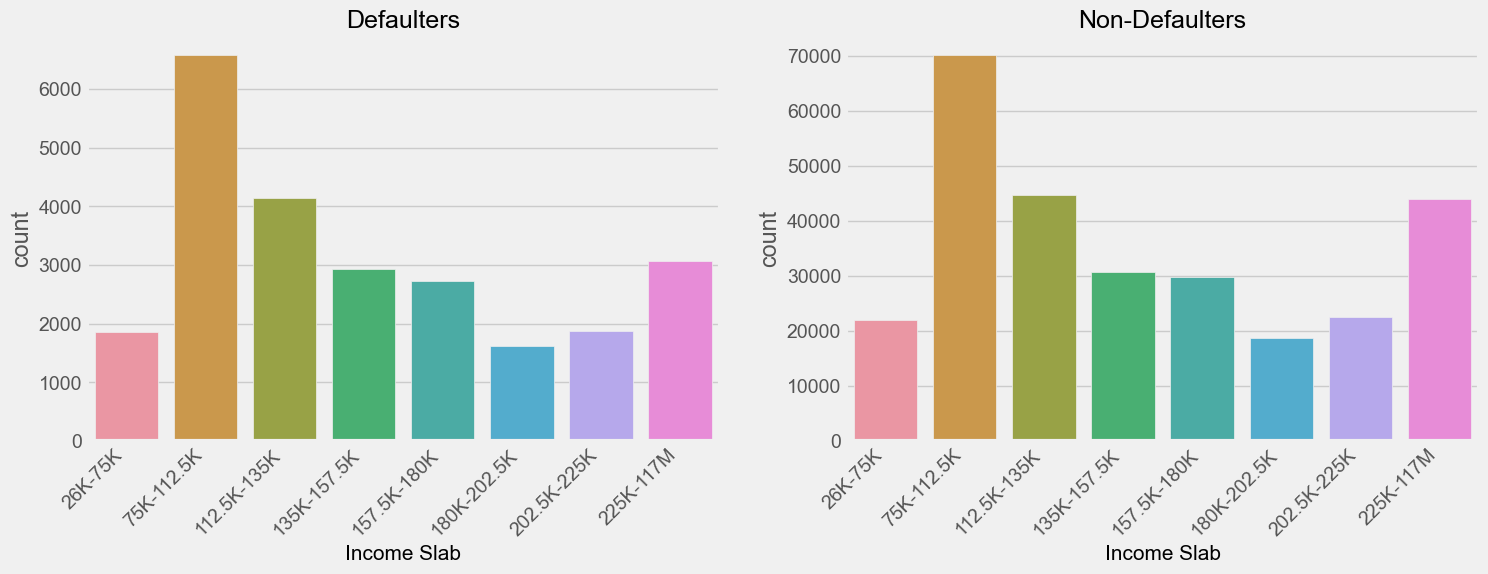

In [103]:
#plotting the graph for clients with payment difficulties

plt.figure(figsize=(16,5))
plt.style.use('fivethirtyeight')
plt.subplot(1,2,1)    
ax = sns.countplot(x = 'AMT_INCOME_GROUP',data=df_t1)
plt.title('Defaulters',fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Black'})
ax.set_xlabel("Income Slab",fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Black'} )
val = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
#plotting the graph for on-time payment clients

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'AMT_INCOME_GROUP',data=df_t0)
plt.title('Non-Defaulters',fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Black'})
ax.set_xlabel("Income Slab",fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Black'} )
val = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.show()

**Observations**:
* <b>Majority of the clients have income in the slab 75K-112.5K followed by the clients in the slab 112.5K-135K.
* <b> Highest number of defaulters also lie in the above slab.

#### Defaulters and Non-Defaulters on the basis of Age Slabs

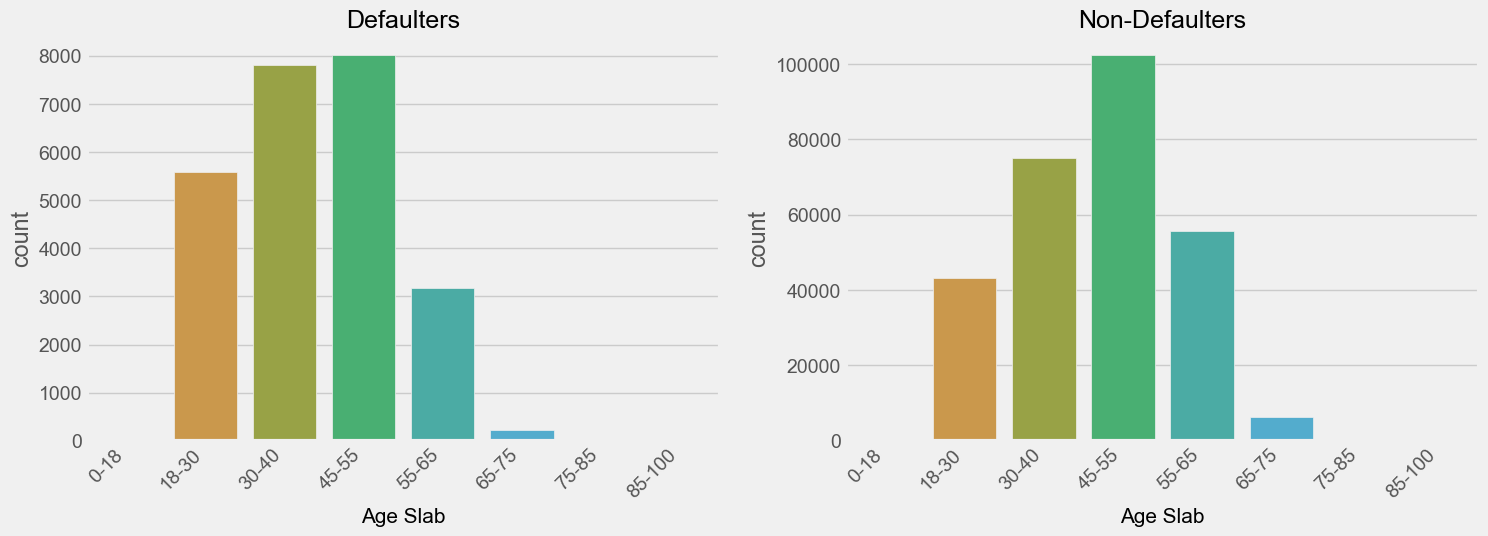

In [104]:
#plotting the graph for clients with payment difficulties

plt.figure(figsize=(16,5))
plt.style.use('fivethirtyeight')
plt.subplot(1,2,1)    
ax = sns.countplot(x = 'YEARS_BIRTH_GROUP',data=df_t1)
plt.title('Defaulters',fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Black'})
ax.set_xlabel("Age Slab",fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Black'} )
val = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

#plotting the graph for on-time payment clients

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'YEARS_BIRTH_GROUP',data=df_t0)
plt.title('Non-Defaulters',fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Black'})
ax.set_xlabel("Age Slab",fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Black'} )
val = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.show()

**Observations**:
* <b>Majority of the clients lie in the age group 45-55 followed by 30-40.
* <b> Least number of defaulters and non- defaulters lie in the age group of 65-75

#### Defaulters and Non-Defaulters on the basis of Credit Amount

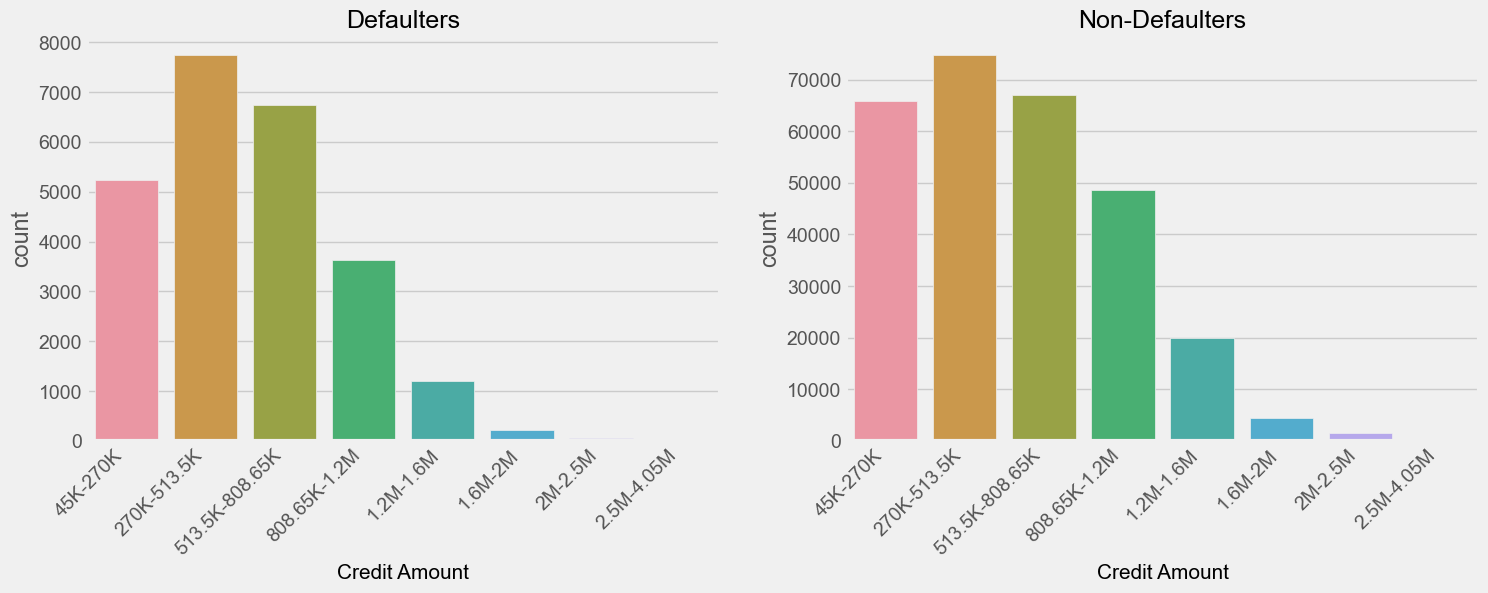

In [105]:
#plotting the graph for clients with payment difficulties

plt.figure(figsize=(16,5))
plt.style.use('fivethirtyeight')
plt.subplot(1,2,1)    
ax = sns.countplot(x = 'AMT_CREDIT_GROUP',data=df_t1)
plt.title('Defaulters',fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Black'})
ax.set_xlabel("Credit Amount",fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Black'} )
val = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

#plotting the graph for on-time payment clients

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'AMT_CREDIT_GROUP',data=df_t0)
plt.title('Non-Defaulters',fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Black'})
ax.set_xlabel("Credit Amount",fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Black'} )
val = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.show()

**Observations**:
* <b>Majority of the clients apply for the loan between 270K- 513.5K are defaulters.
* <b> People taking loans between 2.5M to 4.05M have less defaulter rates.

#### Defaulters and Non-Defaulters on the basis of Number of Family Members

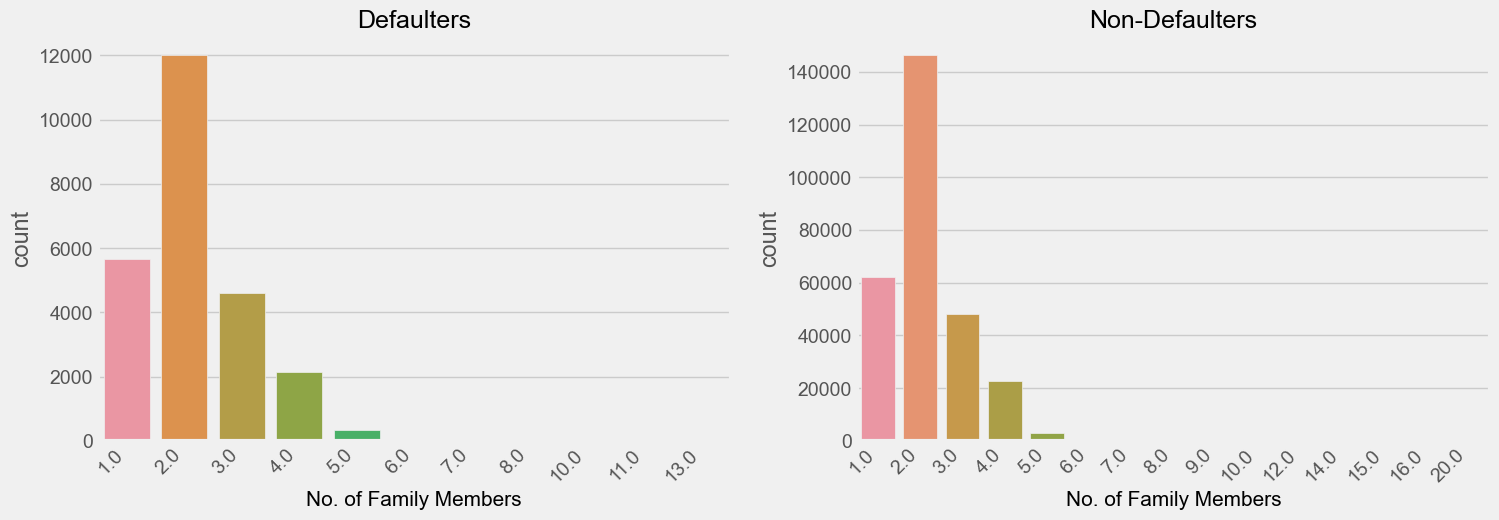

In [106]:

#plotting the graph for clients with payment difficulties

plt.figure(figsize=(16,5))
plt.style.use('fivethirtyeight')
plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CNT_FAM_MEMBERS',data=df_t1)
plt.title('Defaulters',fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Black'})
ax.set_xlabel("No. of Family Members",fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Black'} )
val = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

#plotting the graph for on-time payment clients

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CNT_FAM_MEMBERS',data=df_t0)
plt.title('Non-Defaulters',fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Black'})
ax.set_xlabel("No. of Family Members",fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Black'} )
val = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.show()

**Observations**:
* <b>Majority of the clients who have small family apply for loans and have high deafult rate also.
* <b> Clients who have more then 4 family members have less defaulter rates.

### Bivariate Analysis

<Figure size 1000x1500 with 0 Axes>

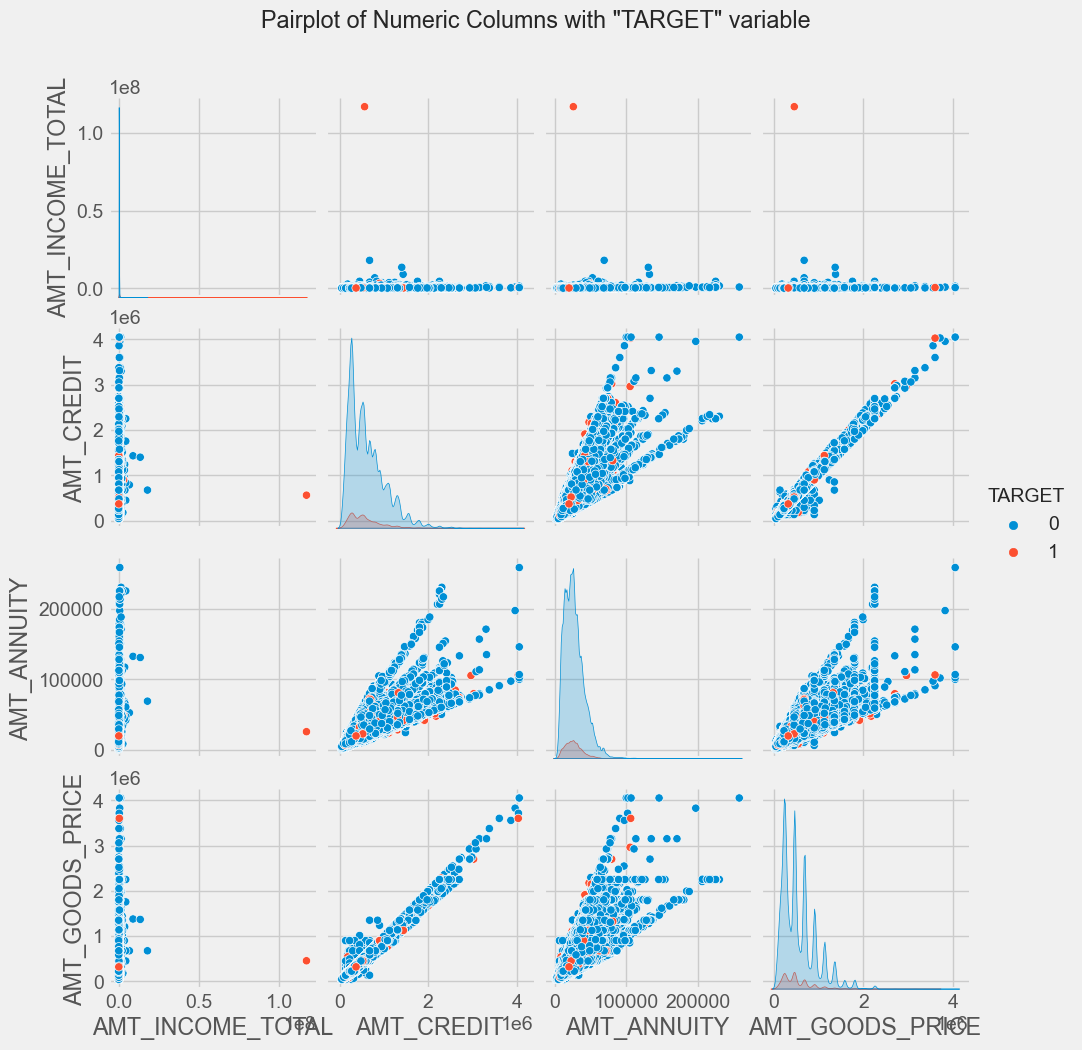

In [107]:
cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

plt.figure(figsize=[10,15])

sns.pairplot(df, vars=cols,hue='TARGET', diag_kind='kde')
plt.suptitle('Pairplot of Numeric Columns with "TARGET" variable',y = 1.05)

plt.show()

**Observations**:
* <b>Loan Amount (AMT_CREDIT) and Goods Price (AMT_GOODS_PRICE) are highly correlated. This high correlation indicates that clients tend to borrow an amount equal to the price of the goods they want to buy.
* <b>When the Annuity Amount is greater than 15K and the Goods Price Amount is greater than 20 lakhs, there appears to be a lower chance of loan defaulters. This suggests that clients with higher annuity and goods price values may be more reliable in terms of loan repayment.
* <b>There are very few defaulters for loan amounts exceeding 2 millions. This suggests that clients who borrow larger sums are less likely to default on their loans.
* <b>AMT_ANNUITY and AMT_CREDIT have strοng pοsitive cοrrelatiοn. This means that as Annuity Amοunt increases, sο dοes Credit Amount    

#### Analysis of two categorical variables

#### Income Group and Age Group

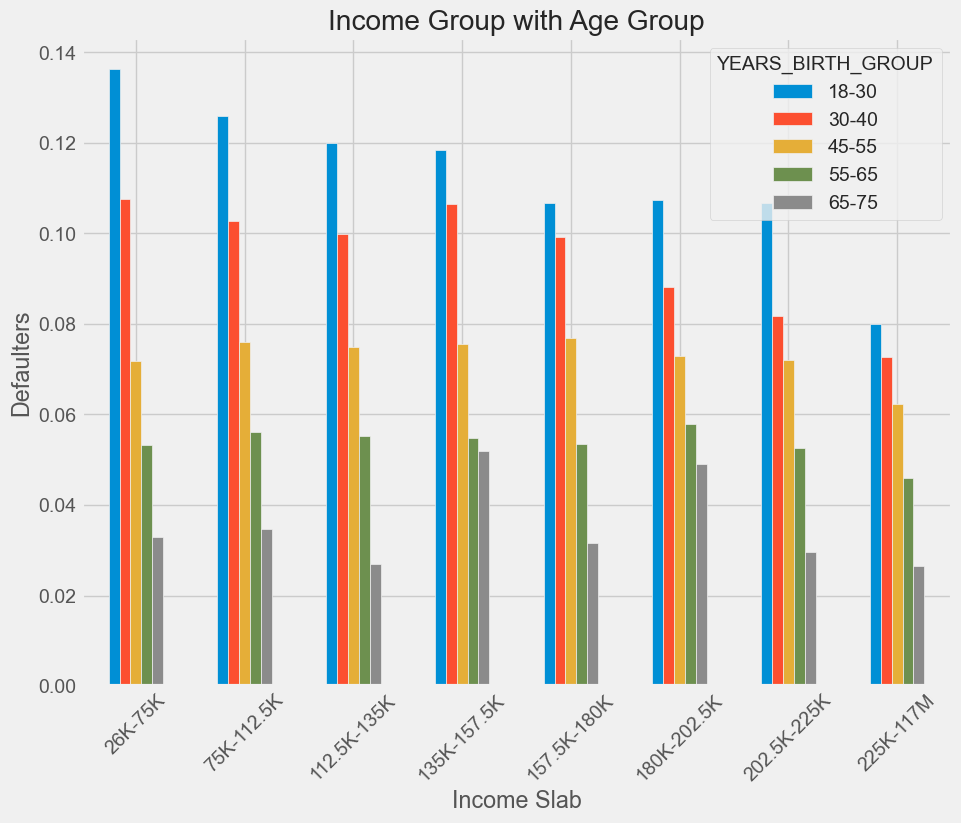

In [108]:

df.pivot_table(values='TARGET',index='AMT_INCOME_GROUP',columns='YEARS_BIRTH_GROUP',aggfunc='mean').plot.bar(figsize=(10,8),rot=45)
plt.xlabel('Income Slab')
plt.ylabel('Defaulters')
plt.title("Income Group with Age Group")
plt.show()

**Observations**:
* <b> Young clients with low income tend to become defaulters.
* <b> Clients with high income tend to repay the loan.   

#### Income Group and Gender

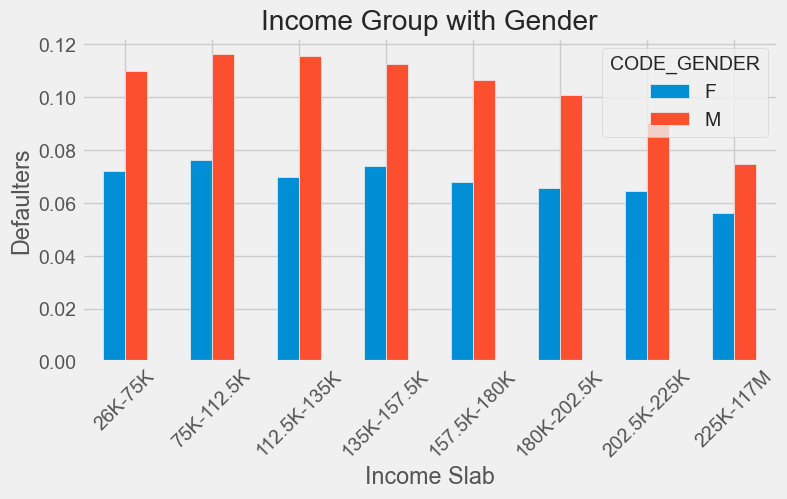

In [109]:
df.pivot_table(values='TARGET',index='AMT_INCOME_GROUP',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,4),rot=45)
plt.xlabel('Income Slab')
plt.ylabel('Defaulters')
plt.title("Income Group with Gender")
plt.show()

**Observations**:
* <b> Male clients earn more income than Female clients but are unable to pay the loan on time.
  

#### Education and Family Status

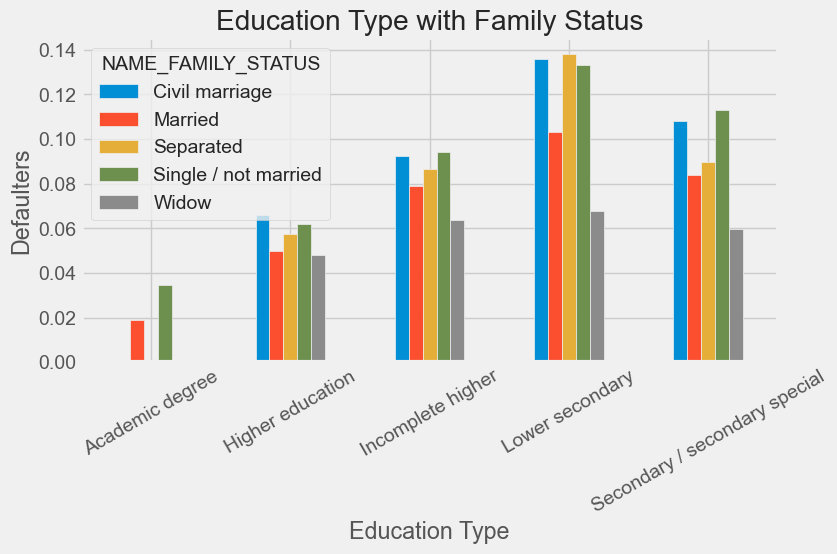

In [110]:
df.pivot_table(values='TARGET',index='NAME_EDUCATION_TYPE',columns='NAME_FAMILY_STATUS',aggfunc='mean').plot.bar(figsize=(8,4),rot=30)
plt.xlabel('Education Type')
plt.ylabel('Defaulters')
plt.title("Education Type with Family Status")
plt.show()

**Observations**:
* <b> Clients with family statuses like ‘civil marriage,’ ‘not marriage,’ and ‘separated’ who have achieved an ‘Lower Secondary’ education tend to have payment with Difficulties.
 

#### Credit Amount group and Income group

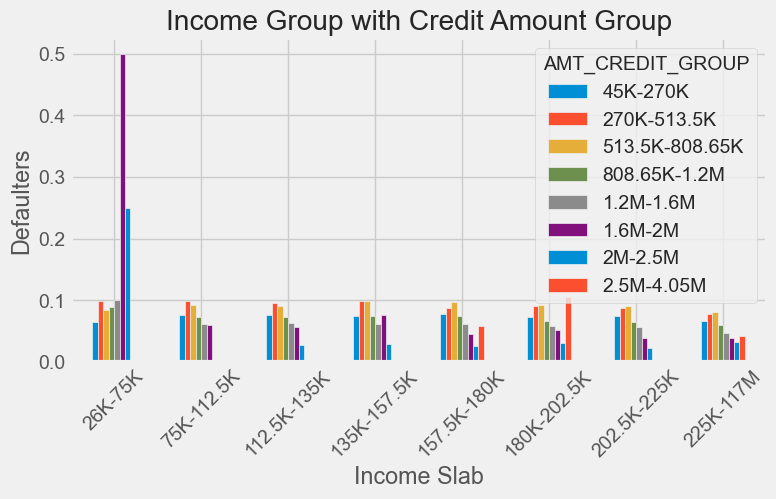

In [111]:
df.pivot_table(values='TARGET',index='AMT_INCOME_GROUP',columns='AMT_CREDIT_GROUP',aggfunc='mean').plot.bar(figsize=(8,4),rot=45)
plt.xlabel('Income Slab')
plt.ylabel('Defaulters')
plt.title("Income Group with Credit Amount Group")
plt.show()

**Observations**:
* <b>Higher Income Group Clients have more amount credited.
 

#### Occupation Type and Gender

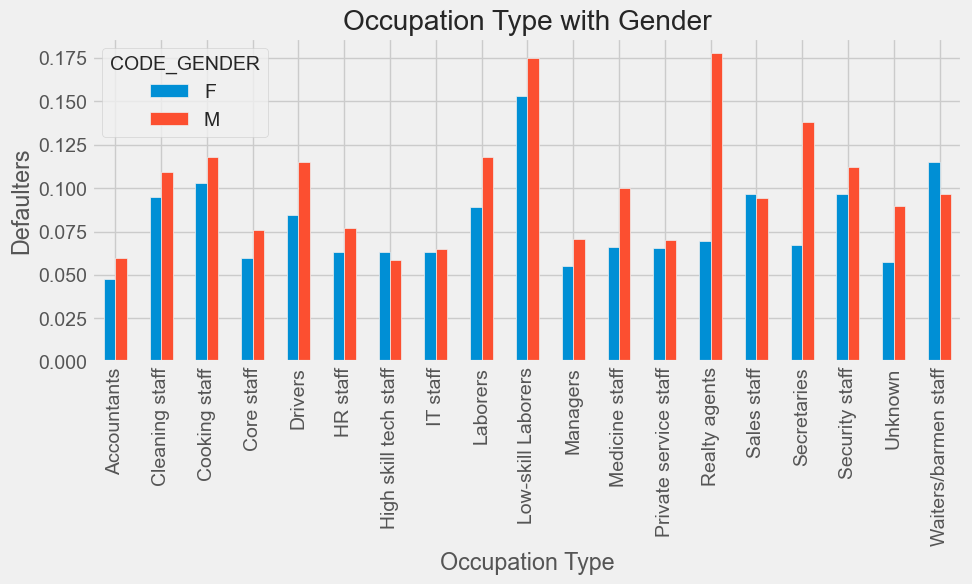

In [112]:
df.pivot_table(values='TARGET',index='OCCUPATION_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(10,4),rot=90)
plt.xlabel('Occupation Type')
plt.ylabel('Defaulters')
plt.title("Occupation Type with Gender")
plt.show()

**Observations**:
* <b> In maximum of the occupation type Males are more non-defaulters than females.
* <b> Males who work as 'Realty agents' have the highest default rate.
* <b> Female Accountants have lowest default rates.

#### Education and Gender

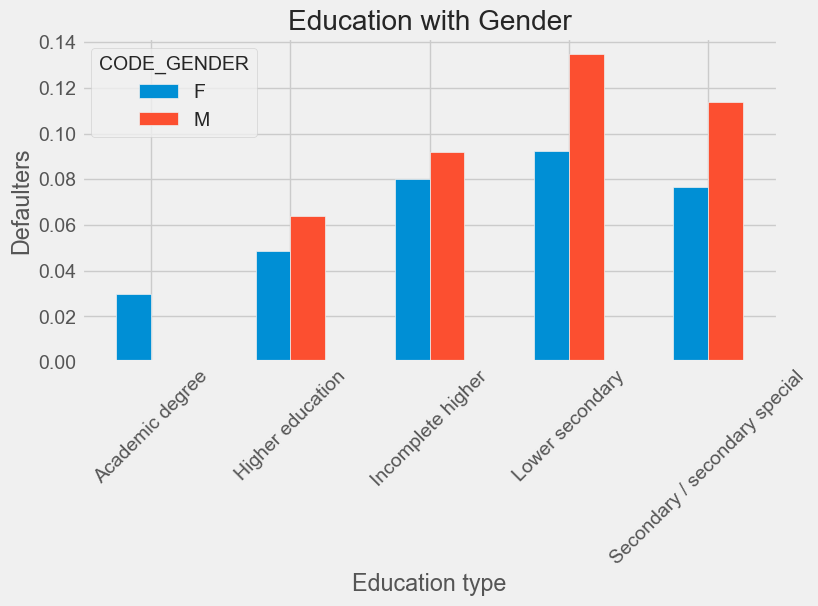

In [113]:
df.pivot_table(values='TARGET',index='NAME_EDUCATION_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,4),rot=45)
plt.xlabel('Education type')
plt.ylabel('Defaulters')
plt.title("Education with Gender")
plt.show()

**Observations**:
* <b> Across all the categories of eductaion males are the one who have a highest default rates as compared to females.
* <b> Both Males and Females with Lower Secondary Eductaion have the highest default rate.    

### Multivariate Analysis

#### Before creating the correlation matrix we shall drop some unwanted columns from the data

In [114]:
flag_cols = [col for col in df.columns if col.startswith('FLAG')]

df_t0.drop(columns=flag_cols,inplace=True)
df_t1.drop(columns=flag_cols,inplace=True)

In [115]:
df_t0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282680 entries, 1 to 307510
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   SK_ID_CURR                 282680 non-null  int64   
 1   TARGET                     282680 non-null  int64   
 2   NAME_CONTRACT_TYPE         282680 non-null  object  
 3   CODE_GENDER                282680 non-null  object  
 4   CNT_CHILDREN               282680 non-null  int64   
 5   AMT_INCOME_TOTAL           282680 non-null  float64 
 6   AMT_CREDIT                 282680 non-null  float64 
 7   AMT_ANNUITY                282680 non-null  float64 
 8   AMT_GOODS_PRICE            282425 non-null  float64 
 9   NAME_TYPE_SUITE            282680 non-null  object  
 10  NAME_INCOME_TYPE           282680 non-null  object  
 11  NAME_EDUCATION_TYPE        282680 non-null  object  
 12  NAME_FAMILY_STATUS         282680 non-null  object  
 13  OCCUPATION_TYP

#### Corelation of relevant numerical columns for defaulters and non defaulters

In [116]:
# Listing the relevant columns for finding corelation
corr_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','YEARS_BIRTH','EXT_SOURCE_2','EXT_SOURCE_3','CNT_FAM_MEMBERS','CNT_CHILDREN']

#### Correlation of Defaulters

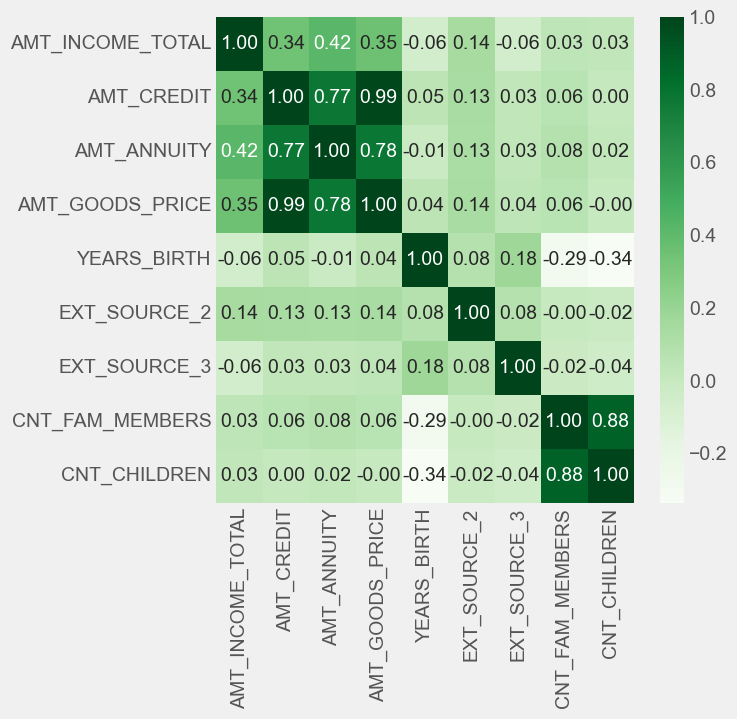

In [117]:
plt.figure(figsize=(6,6))
sns.heatmap(df_t0[corr_cols].corr(),cmap="Greens",annot=True,fmt = '.2f')
plt.show()

**Highly correlated columns for defaulters**
1. AMT_CREDIT and AMT_ANNUITY 
2. AMT_CREDIT and AMT_GOODS_PRICE 
3. AMT_ANNUITY and AMT_GOODS_PRICE
4. CNT_FAM_MEMBERS and CNT_CHILDREN

#### Correlation of Non - Defaulters

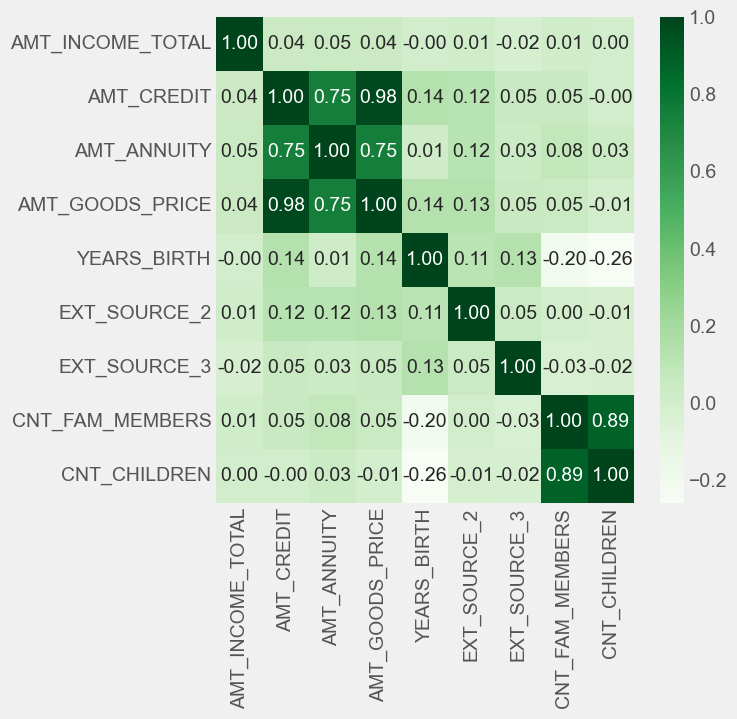

In [118]:
plt.figure(figsize=(6,6))
sns.heatmap(df_t1[corr_cols].corr(),cmap="Greens",annot=True,fmt = '.2f')
plt.show()

**Highly correlated columns for non - defaulters**
1. AMT_CREDIT and AMT_ANNUITY 
2. AMT_CREDIT and AMT_GOODS_PRICE 
3. AMT_ANNUITY and AMT_GOODS_PRICE
4. CNT_FAM_MEMBERS and CNT_CHILDREN

### Now we shall look into the data of clients who applied for loans previously.

In [119]:
#Loading the previous_application data set
prev = pd.read_csv("previous_application.csv")

In [120]:
#Checking the first 5 rows of the data set
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
#determing the shape of the data set
prev.shape

(1670214, 37)

**Obseravtions**: The Data set has 1670214 rows and 37 columns.

In [122]:
#Checking the percentage of null values in data set 
round((prev.isnull().sum()/prev.shape[0])*100,2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

### Dropping the columns having more than 40% of null values

In [123]:
#Listing the columns which have more than 40% null values

col_40 = prev.columns[prev.isnull().sum()/prev.shape[0]*100 > 40]
col_40

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [124]:
#checking the number of columns to be dropped
col_40.size

11

In [125]:
#Dropping the columns with more than 40% null values from the data set

prev.drop(columns = col_40, axis = 1, inplace = True)

In [126]:
#checking if the columns have been dropped or not

prev.shape

(1670214, 26)

**Observations**: We are left with 26 columns now.

In [127]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

**Observations**:
* Going through the columns we have in the data set and their respective meaning, we shall drop them as it wont be used in analysis as these Data Have no Relevance For Current Application Data Dataset Loan Approval.   

In [128]:
# creating a list of columns to be dropped from previous application data set

del_col = ['DAYS_DECISION','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','NFLAG_LAST_APPL_IN_DAY','CODE_REJECT_REASON','CHANNEL_TYPE','NAME_YIELD_GROUP', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY']

In [129]:
prev.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [130]:
#checking the cumber of columns to be dropped
len(del_col)

9

In [131]:
#dropping the columns from the previous data set
prev.drop(del_col,axis = 1, inplace = True)

#checking if the columns have been dropped or not
prev.shape

(1670214, 17)

#### Lets deal with the null values and treat outliers

In [132]:
prev.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
FLAG_LAST_APPL_PER_CONTRACT         0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
NAME_PAYMENT_TYPE                   0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CNT_PAYMENT                    372230
PRODUCT_COMBINATION               346
dtype: int64

**Observations**:
* There are 5 columns where null values are present and looking at the numbers of nulls we will do the following.
<br>
* AMT_ANNUITY :imputing missing values with median as there are outliers in AMT_ANNUITY
* AMT_GOODS_PRICE :imputing missing values with median as there are outliers in AMT_GOODS_PRICE
* CNT_PAYMENT :imputing missing values with median as there are outliers in CNT_PAYMENT
* PRODUCT_COMBINATION: imputing missing values with mode as it is categorical data
* AMT_CREDIT: dropping the row with Null value as only one null value is present

#### AMT_ANNUITY column

In [133]:
prev.AMT_ANNUITY.fillna(prev.AMT_ANNUITY.median(),inplace=True)

#confirming for filling the missing values
prev.AMT_ANNUITY.isnull().sum()

0

#### AMT_GOODS_PRICE column

In [134]:
prev.AMT_GOODS_PRICE.fillna(prev.AMT_GOODS_PRICE.median(),inplace=True)

#confirming for filling the missing values
prev.AMT_GOODS_PRICE.isnull().sum()

0

#### CNT_PAYMENT column

In [135]:
prev.CNT_PAYMENT.fillna(prev.CNT_PAYMENT.median(),inplace=True)

#confirming for filling the missing values
prev.CNT_PAYMENT.isnull().sum()

0

#### PRODUCT_COMBINATION column

In [136]:
prev.PRODUCT_COMBINATION.fillna(prev.PRODUCT_COMBINATION.mode()[0],inplace=True)

#confirming for filling the missing values
prev.PRODUCT_COMBINATION.isnull().sum()

0

#### AMT_CREDIT column

In [137]:
# deleting the rwo with 1 one missing value

prev = prev[~prev['AMT_CREDIT'].isnull()]

prev.AMT_CREDIT.isnull().sum()

0

### Univariate Analysis

#### NAME_CONTRACT_TYPE column

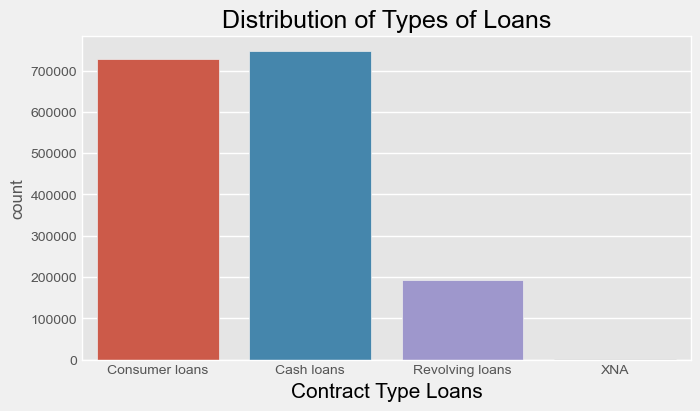

In [138]:
#plotting the count graph 

plt.figure(figsize=(7,4))
plt.style.use('ggplot')
sns.countplot(x = 'NAME_CONTRACT_TYPE',data=prev)
plt.title('Distribution of Types of Loans',fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Black'})
plt.xlabel("Contract Type Loans",fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Black'} )
plt.show()

**Observations**:
* <b>Most Clients apply for Cash Loans followed by Consumer Loans.

#### NAME_CONTRACT_STATUS column

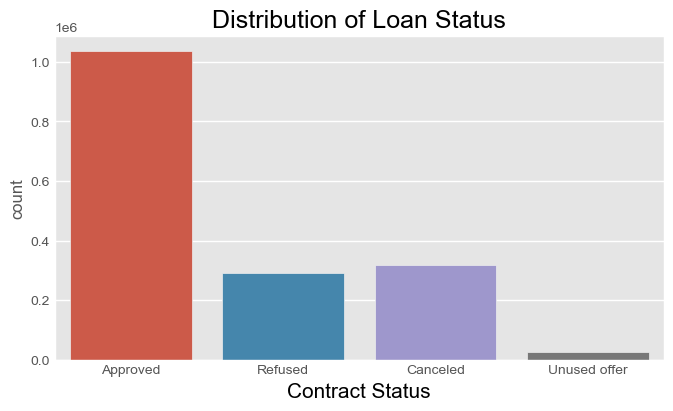

In [139]:
#plotting the count graph 

plt.figure(figsize=(7,4))
plt.style.use('ggplot')
sns.countplot(x = 'NAME_CONTRACT_STATUS',data=prev)
plt.title('Distribution of Loan Status',fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Black'})
plt.xlabel("Contract Status",fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Black'} )
plt.show()

**Observations**:
* <b> Banks generally approve the loans.
* <b> Very Less number of clients did not go ahead with what banks had offered for the loans.

#### NAME_CLIENT_TYPE column

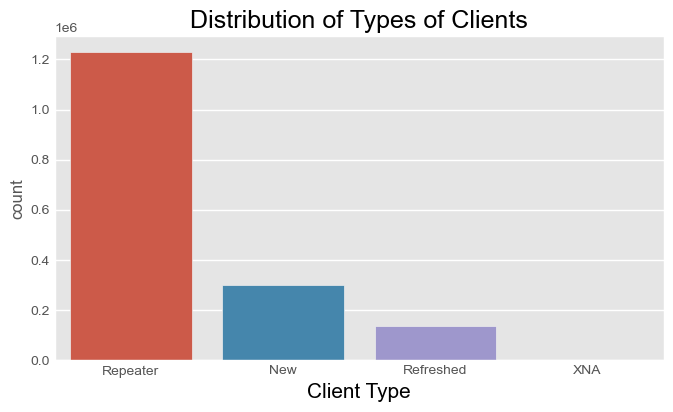

In [140]:
#plotting the count graph 

plt.figure(figsize=(7,4))
plt.style.use('ggplot')
sns.countplot(x = 'NAME_CLIENT_TYPE',data=prev)
plt.title('Distribution of Types of Clients',fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Black'})
plt.xlabel("Client Type",fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Black'} )
plt.show()

**Observations**:
* <b> Majority of the clients applying for loans are Repeat customers.
* <b> Very less clienst fall in the category 'Refreshed'.

#### Portfolio of the previous applications

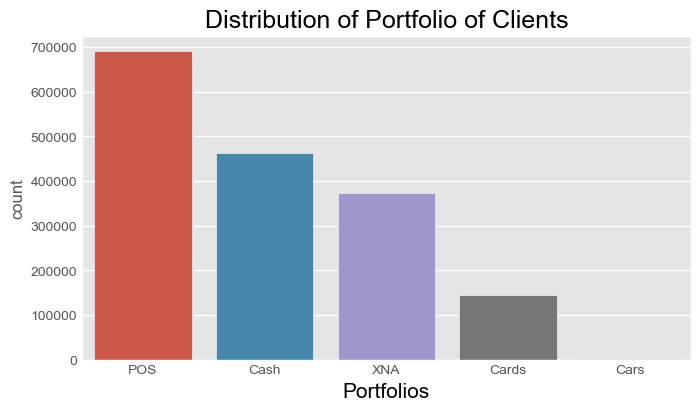

In [141]:
#plotting the count graph 

plt.figure(figsize=(7,4))
plt.style.use('ggplot')
sns.countplot(x = 'NAME_PORTFOLIO',data=prev)
plt.title('Distribution of Portfolio of Clients',fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Black'})
plt.xlabel("Portfolios",fontdict={'fontsize': 15, 'fontweight' : 8, 'color' : 'Black'} )
plt.show()

**Observations**:
* <b>The highest number of the previous applications was for POS followed by Cash.
* <b>Applications for Cards were very few and so for the cars.

In [142]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1670213 entries, 0 to 1670213
Data columns (total 17 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670213 non-null  int64  
 1   SK_ID_CURR                   1670213 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670213 non-null  object 
 3   AMT_ANNUITY                  1670213 non-null  float64
 4   AMT_APPLICATION              1670213 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1670213 non-null  float64
 7   FLAG_LAST_APPL_PER_CONTRACT  1670213 non-null  object 
 8   NAME_CASH_LOAN_PURPOSE       1670213 non-null  object 
 9   NAME_CONTRACT_STATUS         1670213 non-null  object 
 10  NAME_PAYMENT_TYPE            1670213 non-null  object 
 11  NAME_CLIENT_TYPE             1670213 non-null  object 
 12  NAME_GOODS_CATEGORY          1670213 non-n

### Bivariate Analysis

<Figure size 1000x1500 with 0 Axes>

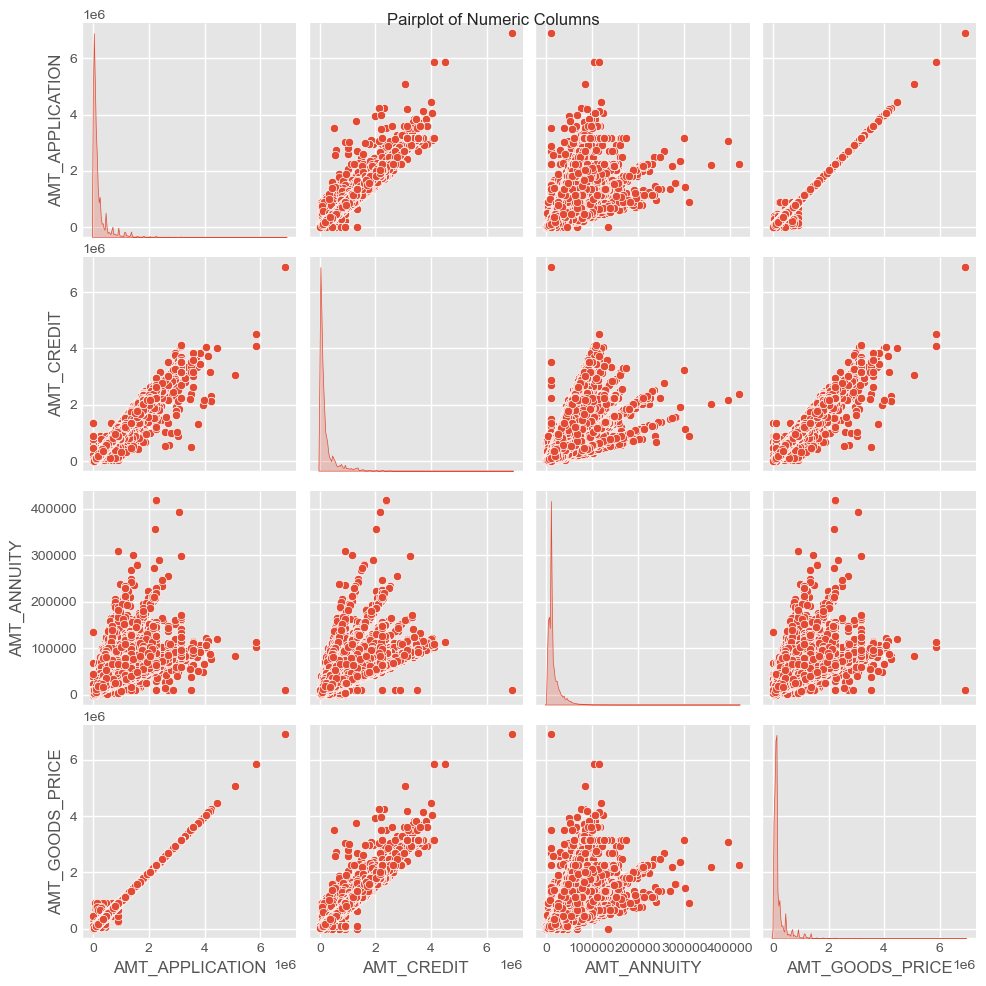

In [143]:
cols = ['AMT_APPLICATION', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

plt.figure(figsize=[10,15])

sns.pairplot(prev, vars=cols, diag_kind='kde')
plt.suptitle('Pairplot of Numeric Columns')

plt.show()

**Observations**:
* <b>AMT_APPLICATION and AMT_GOODS_PRICE have a strong positive correlation indicating that high loan amount tends to high goods price.
* <b>AMT_CREDIT and AMT_GOODS_PRICE have a good correlation.
* <b> AMT_APPLICATION and AMT_CREDIT also have a good correlation.

#### Analysis of two categorical variables

#### Contract Status and Client type

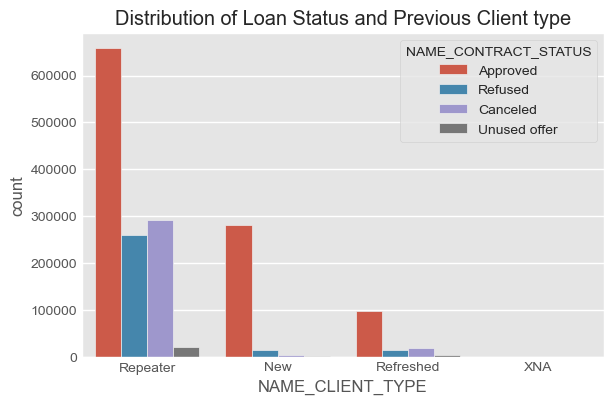

In [144]:
plt.figure(figsize=(6,4))

sns.countplot(x = 'NAME_CLIENT_TYPE' ,hue = 'NAME_CONTRACT_STATUS', data = prev)
plt.title("Distribution of Loan Status and Previous Client type")
plt.show()

**Observations**:
* <b>Banks approve the loans for their repeat customers.
* <b>For New Customers, banks tend not to cancel or refuse their loans.

#### Contract type and Client type

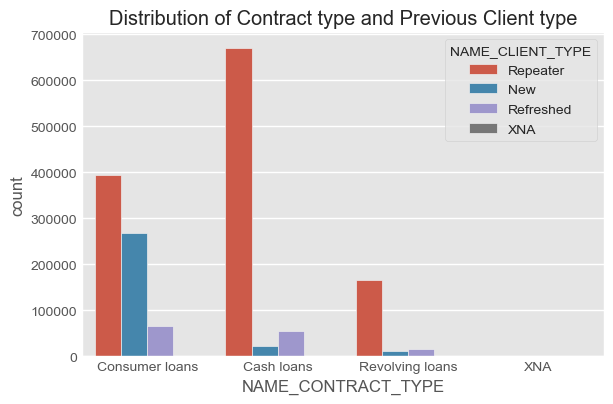

In [145]:
plt.figure(figsize=(6,4))

sns.countplot(x = 'NAME_CONTRACT_TYPE' ,hue = 'NAME_CLIENT_TYPE', data = prev)
plt.title("Distribution of Contract type and Previous Client type")
plt.show()

**Observations**:
* <b>Majorly cash loans are applied by repeat customers followed by consumer loans.
* <b>Refreshed Clients are very less in numbers.

#### Portfolio and Contract Type

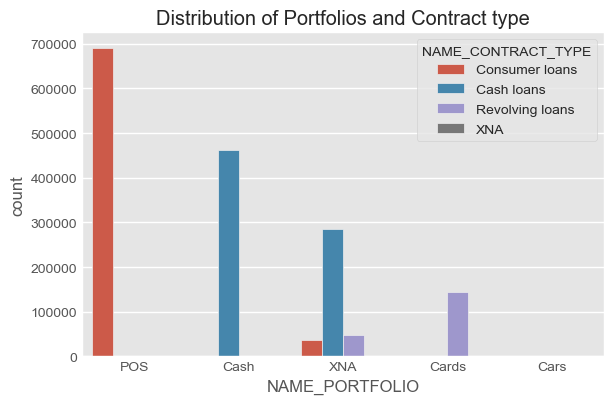

In [146]:
plt.figure(figsize=(6,4))

sns.countplot(x = 'NAME_PORTFOLIO' ,hue = 'NAME_CONTRACT_TYPE', data = prev)
plt.title("Distribution of Portfolios and Contract type")
plt.show()

**Observations**:
* <b>Majorly consumer loans are of POS followed by Cash.
* <b>Very less clients apply for cards or cars.

#### Contract status vs name client type aggregating over application amount

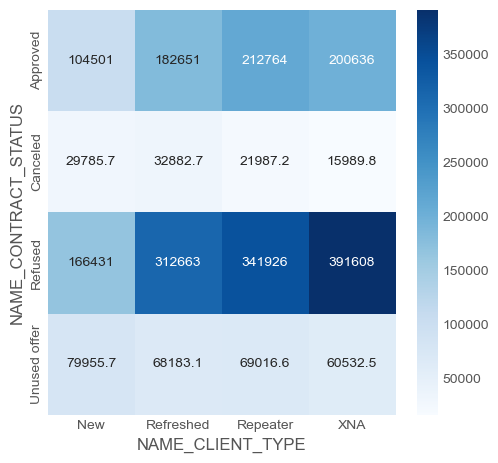

In [147]:
# Checking contract status vs name client type aggregating over application amount
res=pd.pivot_table(data=prev, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_APPLICATION')
plt.figure(figsize=(5,5))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

**Observations**:
* <b> Refused Clients had high Application amount.

### For further analysis we shall merge the two data sets to get more insights

In [148]:
merged_df = pd.merge(df,prev,how='inner',on = 'SK_ID_CURR')

merged_df.shape

(1413645, 58)

**Observations**:
* Merging of the data frames were done using inner join so as to get the concrete information about the client who have currently applied and previously applied for loans to do our analysis.

#### Current loan defaulter status with respect to previous loan application status and Gender

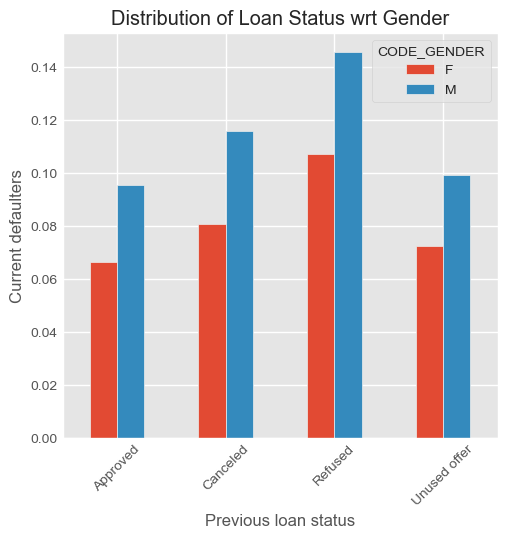

In [149]:
merged_df.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(5,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')
plt.title("Distribution of Loan Status wrt Gender")
plt.show()

**Observations**:
* <b>Previously refused clients are defaulters compared to currently approved clients.
* <b>In all cases Males are the ones who have payment difficulties.

#### Current loan defaulter status with respect to previous loan application status and average income

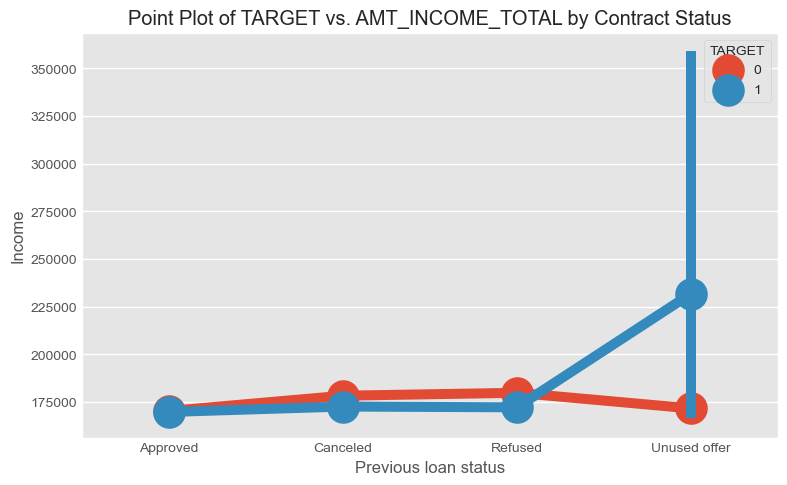

In [150]:
plt.figure(figsize=(8, 5))
sns.pointplot(data = merged_df,hue='TARGET',x='NAME_CONTRACT_STATUS',y='AMT_INCOME_TOTAL')
plt.xlabel('Previous loan status')
plt.ylabel('Income')
plt.title("Point Plot of TARGET vs. AMT_INCOME_TOTAL by Contract Status")
plt.show()

**Observations**:
* <b>Clients who have not used an offer earlier are more likely to default on their loans, even when their average income is higher compared to other contract status categories.

#### Current loan defaulter status with respect to previous loan application status and age group

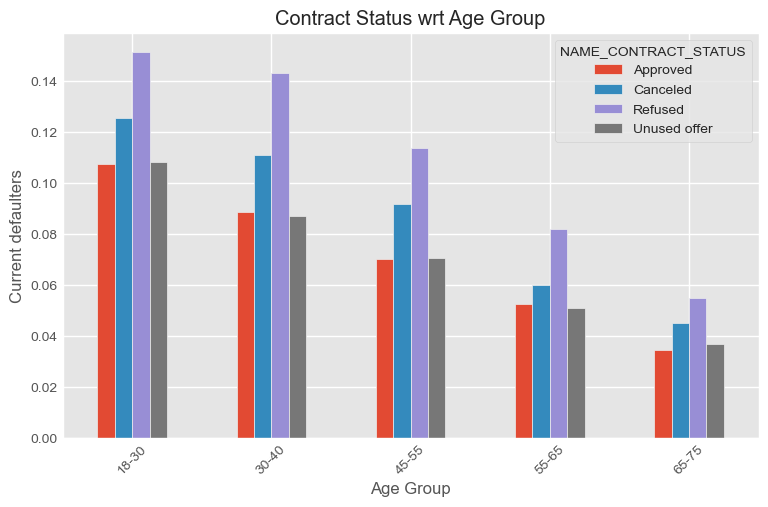

In [151]:
merged_df.pivot_table(values='TARGET',index='YEARS_BIRTH_GROUP',columns='NAME_CONTRACT_STATUS',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Age Group')
plt.ylabel('Current defaulters')
plt.title("Contract Status wrt Age Group")
plt.show()

**Observations**:
* <b> For all previous applications, young clients are the ones who tend to default more than the senior clients.

#### Current loan defaulter status with respect to previous loan application status and Education

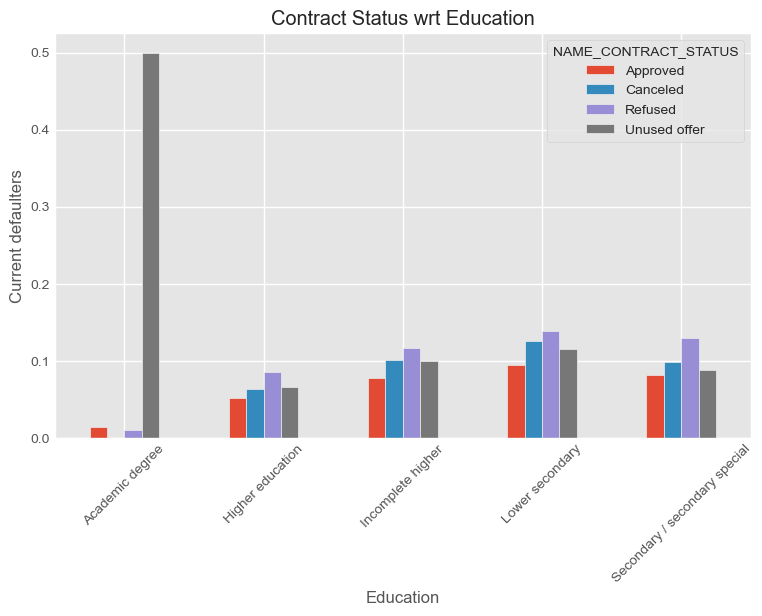

In [152]:
merged_df.pivot_table(values='TARGET',index='NAME_EDUCATION_TYPE',columns='NAME_CONTRACT_STATUS',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Education')
plt.ylabel('Current defaulters')
plt.title("Contract Status wrt Education")
plt.show()

**Observations**:
* <b> Clients with higher education were offered more loans as compared to other categories but they did not use the offer.

#### Current loan defaulter status with respect to previous loan application status and portfolio of the loan

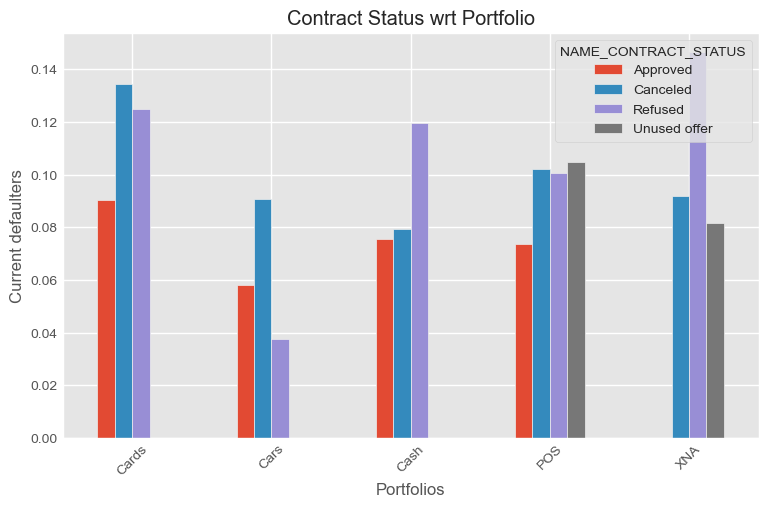

In [153]:
merged_df.pivot_table(values='TARGET',index='NAME_PORTFOLIO',columns='NAME_CONTRACT_STATUS',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Portfolios')
plt.ylabel('Current defaulters')
plt.title("Contract Status wrt Portfolio")
plt.show()

**Observations**:
* <b> Most of the clients were defaulted who previously had applied for cards.
* <b> For approved loans, clients applied for Cars are less defaulted.    

#### Application amount and credited amount

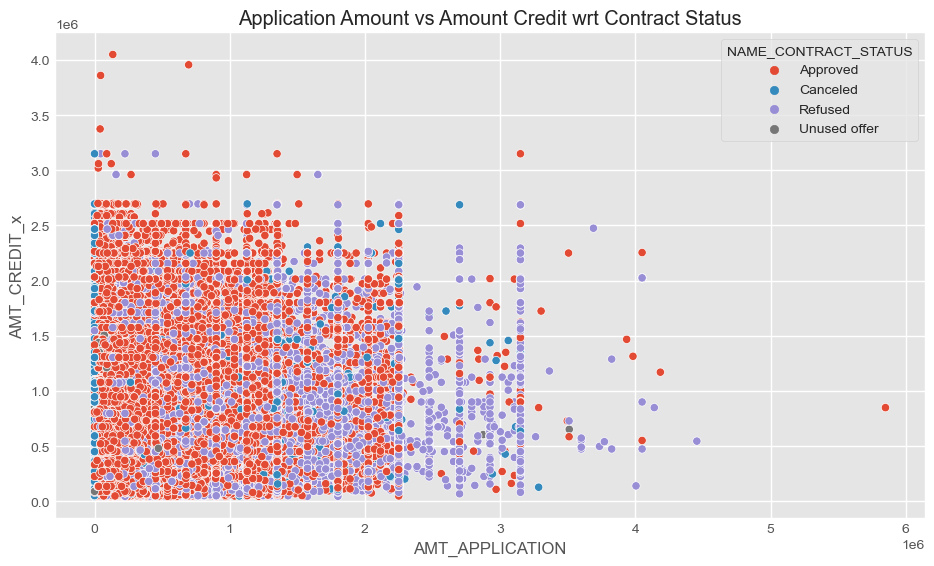

In [154]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'AMT_APPLICATION',y ='AMT_CREDIT_x',hue='NAME_CONTRACT_STATUS', data=merged_df)
plt.title("Application Amount vs Amount Credit wrt Contract Status")
plt.show()

**Observations**
* <b> Maximum of the applications are concentrated for the lesser credit amount and application amount.

In [155]:
merged_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'YEARS_LAST_PHONE_CHANGE',
       'AMT_INCOME_GROUP', 'AMT_CREDIT_GROUP', 'AMT_ANNUITY_GROUP',
       'AMT_GOODS_PRICE_GROUP', 'YEARS_BIRTH', 'YEARS_BIRTH_GROUP',
       'YEARS_EMPLOYED', 'YEARS_ID_PUBLISH', 'SK_ID_PREV',
       'NAME_CONTRACT_TYPE_y', 'AMT_ANNUITY_y', 'AMT_

### Multivariate Analysis

In [156]:
#Meaking A List Of All Numerical Columns From Merged Data Set
merged_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x','AMT_APPLICATION','YEARS_BIRTH', 'AMT_ANNUITY_y', 'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y','YEARS_ID_PUBLISH']

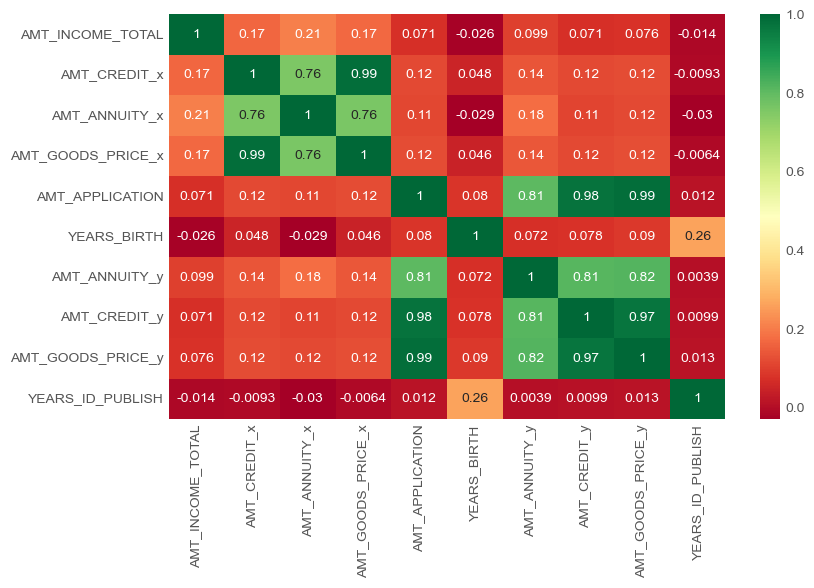

In [157]:
#Correlation Analysis For Merged Dataset
plt.figure(figsize = [8,5])
sns.heatmap(merged_df[merged_cols].corr(), annot = True, cmap = 'RdYlGn')
plt.xticks(rotation = 90)
plt.show()

**Observations**:
* <b> There is Very High Correlation Between Amount Goods Price & Amt Credit; Meaning People Having Higher Goods Price Opt For Higher Amount Of Loan.
* <b> Also we can notice that there is very less correlation of Income with other variables- Income does not affect the risk of payment difficulty.
* <b>Amt Annuity Has Good Correlation With Amt Credit & Amt Goods Price - HIgher the credit value, higher the loan annuity value 
    

## Case Study Summary

<b>1. Banks should focus on female clients as they have less chances of payment difficulty.
    
<b>2. Banks should be careful while providing loans to clients with high income as they are ones who have a high chance of becoming defaulters.   
    
<b>3. Females Ask For Loan More Than Males But Yet Males % Of Approval is Higher Than Females.   
    
<b>4. There is an imbalance ratio of 11%, ie 1 in every 11 people have payment difficulties.   
    
<b>5. Banks should focus on Students and Business as they are less likely to default. 
    
<b>6. Clients with fewer dependents, ranging from zero to two children, are the ones who are not having payment difficulty.
    
<b>7. Individuals in civil marriages or single status exhibit a higher default rate. 
    
<b>8. Majorly 30-45 Years Age People Apply For Loan & Get Approval. 
  
<b>9. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.  
    
<b>10. Certain job categories, such as low-skill laborers, drivers, waiters/barmen staff, security staff, laborers, and cooking staff, carry a higher risk of default.    